# Formula 1 Race Predictor
### CP468 Final Project
### By: Robert Mazza and Ronny Yehia

<img src="./Images/F1-logo.png" alt="F1 Logo" width="50%"/>

Data set used: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020

See the README for more contextual information around this project.

# Data Collection and Cleaning

### Importing the data

In [101]:
import pandas as pd
import numpy as np

# Importing the datasets
results_df = pd.read_csv('./data/results.csv')
status_df = pd.read_csv('./data/status.csv')
drivers_df = pd.read_csv('./data/drivers.csv')
races_df = pd.read_csv('./data/races.csv')
constructor_df = pd.read_csv('./data/constructors.csv')
driver_standings_df = pd.read_csv('./data/driver_standings.csv')
quali_df = pd.read_csv('./data/qualifying.csv')
constructor_standings_df = pd.read_csv('./data/constructor_standings.csv')
pd.get_option("display.max_columns",None)


We are importing the necessary data sets along with the necessary packages to correctly assess the data. The above data sets include races, drivers, standings, results, qualifications for certain races, etc. 

## Qualifying
The rules of qualifying has changed over the years regarding how many sessions there are, and the time they last. The one variable that has never changed is how the fastest lap each driver sets counts towards where they start the race. So for this reason I will only be focusing on the starting position of each driver since that is the result of their qualifying performance.

<img src="./Images/starting-grid.jpg" width="50%"/>


In [102]:

# drop driver number column as it is not needed since we have the driver id
quali_df.drop(['number'], axis=1, inplace=True)

# drop Q1, Q2, Q3 columns as we only care about starting position
quali_df.drop(['q1','q2','q3'], axis=1, inplace=True)

# check for null values
print(quali_df.isna().sum())
# drop all rows that have NULL values
quali_df.dropna(inplace = True)

print((quali_df['qualifyId'] >= 0).all())
print((quali_df['raceId'] >= 0).all())
print((quali_df['driverId'] >= 0).all())
print((quali_df['constructorId'] >= 0).all())
print((quali_df['position'] >= 0).all())

print()


qualifyId        0
raceId           0
driverId         0
constructorId    0
position         0
dtype: int64
True
True
True
True
True



Prior to us even being able to predict which drivers are going to place where, we must see who qualifies. Starting position is based on the time set on the qualifying laps before the actual competitive race has begun. From there we can determine where each driver is starting, which will impact their chances in the race. 

In [103]:
quali_df.head()

,qualifyId,raceId,driverId,constructorId,position
0,1,18,1,1,1
1,2,18,9,2,2
2,3,18,5,1,3
3,4,18,13,6,4
4,5,18,2,2,5


## Races


In [104]:
# drop the time column as it is not needed
races_df.drop(['time'], axis=1, inplace=True)

# drop the wikipedia URLs column
races_df.drop(['url'], axis=1, inplace=True)

# check for null values
print(races_df.isna().sum())

races_df.info()


raceId       0
year         0
round        0
circuitId    0
name         0
date         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1079 non-null   int64 
 1   year       1079 non-null   int64 
 2   round      1079 non-null   int64 
 3   circuitId  1079 non-null   int64 
 4   name       1079 non-null   object
 5   date       1079 non-null   object
dtypes: int64(4), object(2)
memory usage: 50.7+ KB


We can see from the sums above we have no null values.

After dropping unnecessary values that wouldn't be used to determine placement in the actual race, we double check for null values to ensure there are none

In [105]:
races_df.head()

,raceId,year,round,circuitId,name,date
0,1,2009,1,1,Australian Grand Prix,29/03/09
1,2,2009,2,2,Malaysian Grand Prix,05/04/09
2,3,2009,3,17,Chinese Grand Prix,19/04/09
3,4,2009,4,3,Bahrain Grand Prix,26/04/09
4,5,2009,5,4,Spanish Grand Prix,10/05/09


## Results


In [106]:
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [107]:
# check for null values
results_df.isna().sum()

resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

In [108]:
# dropping unneeded columns
results_df.drop(['time', 'number'], axis=1, inplace=True)

In [109]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25460 entries, 0 to 25459
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25460 non-null  int64  
 1   raceId           25460 non-null  int64  
 2   driverId         25460 non-null  int64  
 3   constructorId    25460 non-null  int64  
 4   grid             25460 non-null  int64  
 5   position         25460 non-null  object 
 6   positionText     25460 non-null  object 
 7   positionOrder    25460 non-null  int64  
 8   points           25460 non-null  float64
 9   laps             25460 non-null  int64  
 10  milliseconds     25460 non-null  object 
 11  fastestLap       25460 non-null  object 
 12  rank             25460 non-null  object 
 13  fastestLapTime   25460 non-null  object 
 14  fastestLapSpeed  25460 non-null  object 
 15  statusId         25460 non-null  int64  
dtypes: float64(1), int64(8), object(7)
memory usage: 3.1+ MB


We can see that both "position" and "fastestLapSpeed" are not numerical, which is fixed below.

In [110]:
pd.to_numeric(results_df['fastestLapSpeed'], errors='coerce')
pd.to_numeric(results_df['position'], errors='coerce')

0         1.0
1         2.0
2         3.0
3         4.0
4         5.0
         ... 
25455    16.0
25456    17.0
25457     NaN
25458     NaN
25459     NaN
Name: position, Length: 25460, dtype: float64

## Driver Standings

In [111]:
# check for null values
print(driver_standings_df.isna().sum())

driver_standings_df.info()

print("Checking if all values are equal or greater than zero")
# check if each coloumn that is int64 has a value greater or equal of zero
# True = good, False = bad
print((driver_standings_df['driverStandingsId'] >= 0).all())
print((driver_standings_df['raceId'] >= 0).all())
print((driver_standings_df['driverId'] >= 0).all())
print((driver_standings_df['points'] >= 0).all())
print((driver_standings_df['position'] >= 0).all())
print((driver_standings_df['wins'] >= 0).all())

# dropping unneeded columns
driver_standings_df.drop(['driverStandingsId', 'positionText' ], axis=1, inplace=True)
# renaming the columns for easier understanding
driver_standings_df.rename(columns = {'wins':'driver_standings_race_wins', 'points':'driver_standings_points', 'position': 'driver_standings_position'}, inplace = True)



driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33476 entries, 0 to 33475
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33476 non-null  int64  
 1   raceId             33476 non-null  int64  
 2   driverId           33476 non-null  int64  
 3   points             33476 non-null  float64
 4   position           33476 non-null  int64  
 5   positionText       33476 non-null  object 
 6   wins               33476 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB
Checking if all values are equal or greater than zero
True
True
True
True
True
True


As presumed, the driver standings are determined by numerous factors. All the values above that are checked whether they are larger or equal to 0 play a role in determining standings, points, position, wins, etc. All these values are taken into account when attempting to determine who is likely to place where in the race

In [112]:
driver_standings_df.head()

,raceId,driverId,driver_standings_points,driver_standings_position,driver_standings_race_wins
0,18,1,10.0,1,1
1,18,2,8.0,2,0
2,18,3,6.0,3,0
3,18,4,5.0,4,0
4,18,5,4.0,5,0


## Constructors Standings

Formula 1 didn't have a Constructors Champiionship till 1958, before that the only championship was the Drivers Championship. So we will not have values in this dataset that represent any races before 1958.

In [113]:
# check for null values
print(constructor_standings_df.isna().sum())



print("Checking if all values are equal or greater than zero")
# check if each coloumn that is int64 has a value greater or equal of zero
# True = good, False = bad
print((constructor_standings_df['raceId'] >= 0).all())
print((constructor_standings_df['constructorId'] >= 0).all())
print((constructor_standings_df['points'] >= 0).all())
print((constructor_standings_df['position'] >= 0).all())
print((constructor_standings_df['wins'] >= 0).all())

# dropping useless columns
constructor_standings_df.drop(['constructorStandingsId', 'positionText'], axis=1, inplace=True)
# rename columns to avoid confusion with other dataframes
constructor_standings_df.rename(columns = {'wins':'constructor_race_wins', 'points':'constructor_points', 'position': 'constructor_position'}, inplace = True)

constructor_standings_df.info()

constructorStandingsId    0
raceId                    0
constructorId             0
points                    0
position                  0
positionText              0
wins                      0
dtype: int64
Checking if all values are equal or greater than zero
True
True
True
True
True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   raceId                 12741 non-null  int64  
 1   constructorId          12741 non-null  int64  
 2   constructor_points     12741 non-null  float64
 3   constructor_position   12741 non-null  int64  
 4   constructor_race_wins  12741 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 497.8 KB


In [114]:
constructor_standings_df.head()

,raceId,constructorId,constructor_points,constructor_position,constructor_race_wins
0,18,1,14.0,1,1
1,18,2,8.0,3,0
2,18,3,9.0,2,0
3,18,4,5.0,4,0
4,18,5,2.0,5,0


## Constructors

There have been many different constructors ever the years, not all still race in current seasons but there are still a few that have never left F1, such as Ferrari, Williams, and McLaren.

In [115]:
# check for null values
print(constructor_df.isna().sum())

# drop URL column
constructor_df.drop(['url'], axis=1, inplace=True)
# drop constructor natonality column as it is not needed
constructor_df.drop(['nationality'], axis=1, inplace=True)

constructor_df.info()

print("Checking if all values are equal or greater than zero")
# check if each coloumn that has a value greater or equal of zero or not ''
# True = good, False = bad
print((constructor_df['name'] != '').all())
print((constructor_df['constructorRef'] != '').all())
print((constructor_df['constructorId'] >= 0).all())


constructorId     0
constructorRef    0
name              0
nationality       0
url               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.1+ KB
Checking if all values are equal or greater than zero
True
True
True


A majority of the above code is testing to ensure that the data is usable, which is why we are checking for 0 values or NULL values in most of them. Values with 0 or NULL cannot be used in predicting placement.

In [116]:
constructor_df.head()

,constructorId,constructorRef,name
0,1,mclaren,McLaren
1,2,bmw_sauber,BMW Sauber
2,3,williams,Williams
3,4,renault,Renault
4,5,toro_rosso,Toro Rosso


## Drivers

In [117]:
# check for null values
print(drivers_df.isna().sum())
# drop URL column
drivers_df.drop(['url'], axis=1, inplace=True)
# drop constructor natonality column as it is not needed
drivers_df.drop(['nationality'], axis=1, inplace=True)
# drop driver number column, we will refer to each driver by their last name
drivers_df.drop(['number'], axis=1, inplace=True )

drivers_df.info()

print("Checking if all values are equal or greater than zero")
# check if each coloumn that has a value greater or equal of zero or not ''
# True = good, False = bad
print((drivers_df['driverRef'] != '').all())
print((drivers_df['code'] != '').all())
print((drivers_df['forename'] != '').all())
print((drivers_df['surname'] != '').all())
print((drivers_df['driverId'] >= 0).all())


driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   driverId   854 non-null    int64 
 1   driverRef  854 non-null    object
 2   code       854 non-null    object
 3   forename   854 non-null    object
 4   surname    854 non-null    object
 5   dob        854 non-null    object
dtypes: int64(1), object(5)
memory usage: 40.2+ KB
Checking if all values are equal or greater than zero
True
True
True
True
True


In [118]:
drivers_df.head()

,driverId,driverRef,code,forename,surname,dob
0,1,hamilton,HAM,Lewis,Hamilton,1985-01-07
1,2,heidfeld,HEI,Nick,Heidfeld,1977-05-10
2,3,rosberg,ROS,Nico,Rosberg,1985-06-27
3,4,alonso,ALO,Fernando,Alonso,1981-07-29
4,5,kovalainen,KOV,Heikki,Kovalainen,1981-10-19


## Status
Describes the status of the car in respect to finishing the race. If the car did not finish the race then it will have a "Status" that gives some more detail to why the car did not finish. 

In [119]:
# check for null values
print(status_df.isna().sum())

status_df.info()

print((status_df['statusId'] >= 0).all())
print((status_df['status'] != '').all())


statusId    0
status      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  137 non-null    int64 
 1   status    137 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB
True
True


In [120]:
status_df.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


# Data Preperation

Merging all the dataframes into a single comprehensive one.

In [121]:
# merging all seperate dataframe into single dataframe as df

df0 = pd.merge(results_df, constructor_standings_df, on = ['raceId', 'constructorId'])
df0.head()

,resultId,raceId,driverId,constructorId,grid,position,positionText,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructor_points,constructor_position,constructor_race_wins
0,1,18,1,1,1,1,1,1,10.0,58,5690616,39,2,1:27.452,218.300,1,14.0,1,1
1,5,18,5,1,3,5,5,5,4.0,58,5708630,43,1,1:27.418,218.385,1,14.0,1,1
2,2,18,2,2,5,2,2,2,8.0,58,5696094,41,3,1:27.739,217.586,1,8.0,3,0
3,9,18,9,2,2,\N,R,9,0.0,47,\N,15,9,1:28.753,215.100,4,8.0,3,0
4,3,18,3,3,7,3,3,3,6.0,58,5698779,41,5,1:28.090,216.719,1,9.0,2,0


In [122]:

df1 = pd.merge(df0, races_df, on ='raceId')
df1.head()


,resultId,raceId,driverId,constructorId,grid,position,positionText,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructor_points,constructor_position,constructor_race_wins,year,round,circuitId,name,date
0,1,18,1,1,1,1,1,1,10.0,58,5690616,39,2,1:27.452,218.300,1,14.0,1,1,2008,1,1,Australian Grand Prix,16/03/08
1,5,18,5,1,3,5,5,5,4.0,58,5708630,43,1,1:27.418,218.385,1,14.0,1,1,2008,1,1,Australian Grand Prix,16/03/08
2,2,18,2,2,5,2,2,2,8.0,58,5696094,41,3,1:27.739,217.586,1,8.0,3,0,2008,1,1,Australian Grand Prix,16/03/08
3,9,18,9,2,2,\N,R,9,0.0,47,\N,15,9,1:28.753,215.100,4,8.0,3,0,2008,1,1,Australian Grand Prix,16/03/08
4,3,18,3,3,7,3,3,3,6.0,58,5698779,41,5,1:28.090,216.719,1,9.0,2,0,2008,1,1,Australian Grand Prix,16/03/08


In [123]:

df2 = pd.merge(df1, drivers_df, on = 'driverId')

df2.head()

,resultId,raceId,driverId,constructorId,grid,position,positionText,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructor_points,constructor_position,constructor_race_wins,year,round,circuitId,name,date,driverRef,code,forename,surname,dob
0,1,18,1,1,1,1,1,1,10.0,58,5690616,39,2,1:27.452,218.300,1,14.0,1,1,2008,1,1,Australian Grand Prix,16/03/08,hamilton,HAM,Lewis,Hamilton,1985-01-07
1,27,19,1,1,9,5,5,5,4.0,56,5525103,53,3,1:35.462,209.033,1,24.0,1,1,2008,2,2,Malaysian Grand Prix,23/03/08,hamilton,HAM,Lewis,Hamilton,1985-01-07
2,57,20,1,1,3,13,13,13,0.0,56,\N,25,19,1:35.520,203.969,11,28.0,3,1,2008,3,3,Bahrain Grand Prix,06/04/08,hamilton,HAM,Lewis,Hamilton,1985-01-07
3,69,21,1,1,5,3,3,3,6.0,66,5903238,20,3,1:22.017,204.323,1,34.0,3,1,2008,4,4,Spanish Grand Prix,27/04/08,hamilton,HAM,Lewis,Hamilton,1985-01-07
4,90,22,1,1,3,2,2,2,8.0,58,5213230,31,2,1:26.529,222.085,1,42.0,3,1,2008,5,5,Turkish Grand Prix,11/05/08,hamilton,HAM,Lewis,Hamilton,1985-01-07


In [124]:

df3 = pd.merge(df2, constructor_df, on ='constructorId')
df3.head()

,resultId,raceId,driverId,constructorId,grid,position,positionText,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructor_points,constructor_position,constructor_race_wins,year,round,circuitId,name_x,date,driverRef,code,forename,surname,dob,constructorRef,name_y
0,1,18,1,1,1,1,1,1,10.0,58,5690616,39,2,1:27.452,218.300,1,14.0,1,1,2008,1,1,Australian Grand Prix,16/03/08,hamilton,HAM,Lewis,Hamilton,1985-01-07,mclaren,McLaren
1,27,19,1,1,9,5,5,5,4.0,56,5525103,53,3,1:35.462,209.033,1,24.0,1,1,2008,2,2,Malaysian Grand Prix,23/03/08,hamilton,HAM,Lewis,Hamilton,1985-01-07,mclaren,McLaren
2,57,20,1,1,3,13,13,13,0.0,56,\N,25,19,1:35.520,203.969,11,28.0,3,1,2008,3,3,Bahrain Grand Prix,06/04/08,hamilton,HAM,Lewis,Hamilton,1985-01-07,mclaren,McLaren
3,69,21,1,1,5,3,3,3,6.0,66,5903238,20,3,1:22.017,204.323,1,34.0,3,1,2008,4,4,Spanish Grand Prix,27/04/08,hamilton,HAM,Lewis,Hamilton,1985-01-07,mclaren,McLaren
4,90,22,1,1,3,2,2,2,8.0,58,5213230,31,2,1:26.529,222.085,1,42.0,3,1,2008,5,5,Turkish Grand Prix,11/05/08,hamilton,HAM,Lewis,Hamilton,1985-01-07,mclaren,McLaren


In [125]:

df = pd.merge(df3, status_df, on ='statusId')
pd.get_option("display.max_columns",None)

df.drop(['statusId', 'rank','fastestLapTime', 'constructorId', 'constructorRef', 'driverRef'], axis=1, inplace=True)

df.head()

,resultId,raceId,driverId,grid,position,positionText,positionOrder,points,laps,milliseconds,fastestLap,fastestLapSpeed,constructor_points,constructor_position,constructor_race_wins,year,round,circuitId,name_x,date,code,forename,surname,dob,name_y,status
0,1,18,1,1,1,1,1,10.0,58,5690616,39,218.300,14.0,1,1,2008,1,1,Australian Grand Prix,16/03/08,HAM,Lewis,Hamilton,1985-01-07,McLaren,Finished
1,27,19,1,9,5,5,5,4.0,56,5525103,53,209.033,24.0,1,1,2008,2,2,Malaysian Grand Prix,23/03/08,HAM,Lewis,Hamilton,1985-01-07,McLaren,Finished
2,69,21,1,5,3,3,3,6.0,66,5903238,20,204.323,34.0,3,1,2008,4,4,Spanish Grand Prix,27/04/08,HAM,Lewis,Hamilton,1985-01-07,McLaren,Finished
3,90,22,1,3,2,2,2,8.0,58,5213230,31,222.085,42.0,3,1,2008,5,5,Turkish Grand Prix,11/05/08,HAM,Lewis,Hamilton,1985-01-07,McLaren,Finished
4,109,23,1,3,1,1,1,10.0,76,7242742,71,153.152,53.0,2,2,2008,6,6,Monaco Grand Prix,25/05/08,HAM,Lewis,Hamilton,1985-01-07,McLaren,Finished


In [126]:
df.columns

Index(['resultId', 'raceId', 'driverId', 'grid', 'position', 'positionText',
       'positionOrder', 'points', 'laps', 'milliseconds', 'fastestLap',
       'fastestLapSpeed', 'constructor_points', 'constructor_position',
       'constructor_race_wins', 'year', 'round', 'circuitId', 'name_x', 'date',
       'code', 'forename', 'surname', 'dob', 'name_y', 'status'],
      dtype='object')

In [127]:
col_name = {'milliseconds':'timetaken_in_millisec','fastestLapSpeed':'max_speed',
 'name_x':'grand_prix','number_y':'driver_num','code':'driver_code','name_y':'constructor_name',
 'raceId_x':'racerId','points_x':'points'}

df.rename(columns=col_name, inplace=True)

df.head()

,resultId,raceId,driverId,grid,position,positionText,positionOrder,points,laps,timetaken_in_millisec,fastestLap,max_speed,constructor_points,constructor_position,constructor_race_wins,year,round,circuitId,grand_prix,date,driver_code,forename,surname,dob,constructor_name,status
0,1,18,1,1,1,1,1,10.0,58,5690616,39,218.300,14.0,1,1,2008,1,1,Australian Grand Prix,16/03/08,HAM,Lewis,Hamilton,1985-01-07,McLaren,Finished
1,27,19,1,9,5,5,5,4.0,56,5525103,53,209.033,24.0,1,1,2008,2,2,Malaysian Grand Prix,23/03/08,HAM,Lewis,Hamilton,1985-01-07,McLaren,Finished
2,69,21,1,5,3,3,3,6.0,66,5903238,20,204.323,34.0,3,1,2008,4,4,Spanish Grand Prix,27/04/08,HAM,Lewis,Hamilton,1985-01-07,McLaren,Finished
3,90,22,1,3,2,2,2,8.0,58,5213230,31,222.085,42.0,3,1,2008,5,5,Turkish Grand Prix,11/05/08,HAM,Lewis,Hamilton,1985-01-07,McLaren,Finished
4,109,23,1,3,1,1,1,10.0,76,7242742,71,153.152,53.0,2,2,2008,6,6,Monaco Grand Prix,25/05/08,HAM,Lewis,Hamilton,1985-01-07,McLaren,Finished


In [128]:
# Combining the forename and surname of the driver into a single column
df['driver_name'] = df['forename'] + ' ' + df['surname']
df  = df.drop(['forename', 'surname'], axis=1)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23593 entries, 0 to 23592
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   resultId               23593 non-null  int64  
 1   raceId                 23593 non-null  int64  
 2   driverId               23593 non-null  int64  
 3   grid                   23593 non-null  int64  
 4   position               23593 non-null  object 
 5   positionText           23593 non-null  object 
 6   positionOrder          23593 non-null  int64  
 7   points                 23593 non-null  float64
 8   laps                   23593 non-null  int64  
 9   timetaken_in_millisec  23593 non-null  object 
 10  fastestLap             23593 non-null  object 
 11  max_speed              23593 non-null  object 
 12  constructor_points     23593 non-null  float64
 13  constructor_position   23593 non-null  int64  
 14  constructor_race_wins  23593 non-null  int64  
 15  ye

Date and dob columns are being stored as an Object, so it will be changed to Date object below.

In [130]:
pd.to_datetime(df.date)

0       2008-03-16
1       2008-03-23
2       2008-04-27
3       2008-11-05
4       2008-05-25
           ...    
23588   2070-04-10
23589   2068-01-01
23590   2063-06-23
23591   2064-11-07
23592   2062-07-10
Name: date, Length: 23593, dtype: datetime64[ns]

In [131]:
df['dob'] = pd.to_datetime(df['dob'])
df['date'] = pd.to_datetime(df['date'])

In [132]:
from datetime import datetime

# getting each driver's age and storing it in a new column 'age'

dates = datetime.today()-df['dob']
age = dates.dt.days/365
# round them up if they are close to their next birthday than their last
df['age'] = round(age) 
pd.set_option('display.max_columns', None)

df.drop(['dob'], axis=1, inplace=True)

df.head()

,resultId,raceId,driverId,grid,position,positionText,positionOrder,points,laps,timetaken_in_millisec,fastestLap,max_speed,constructor_points,constructor_position,constructor_race_wins,year,round,circuitId,grand_prix,date,driver_code,constructor_name,status,driver_name,age
0,1,18,1,1,1,1,1,10.0,58,5690616,39,218.300,14.0,1,1,2008,1,1,Australian Grand Prix,2008-03-16,HAM,McLaren,Finished,Lewis Hamilton,38.0
1,27,19,1,9,5,5,5,4.0,56,5525103,53,209.033,24.0,1,1,2008,2,2,Malaysian Grand Prix,2008-03-23,HAM,McLaren,Finished,Lewis Hamilton,38.0
2,69,21,1,5,3,3,3,6.0,66,5903238,20,204.323,34.0,3,1,2008,4,4,Spanish Grand Prix,2008-04-27,HAM,McLaren,Finished,Lewis Hamilton,38.0
3,90,22,1,3,2,2,2,8.0,58,5213230,31,222.085,42.0,3,1,2008,5,5,Turkish Grand Prix,2008-11-05,HAM,McLaren,Finished,Lewis Hamilton,38.0
4,109,23,1,3,1,1,1,10.0,76,7242742,71,153.152,53.0,2,2,2008,6,6,Monaco Grand Prix,2008-05-25,HAM,McLaren,Finished,Lewis Hamilton,38.0


In [133]:
# changing datatype

l = ['timetaken_in_millisec','fastestLap','max_speed']
for i in l:
    df[i] = pd.to_numeric(df[i],errors='coerce')

In [134]:
# filling missing values
df[['fastestLap']] = df[['fastestLap']].fillna(0)
df['timetaken_in_millisec'] = df['timetaken_in_millisec'].fillna(df['timetaken_in_millisec'].mean())
df['max_speed']= df['max_speed'].fillna(df['max_speed'].mean())
df.isnull().sum() / len(df) * 100

resultId                 0.0
raceId                   0.0
driverId                 0.0
grid                     0.0
position                 0.0
positionText             0.0
positionOrder            0.0
points                   0.0
laps                     0.0
timetaken_in_millisec    0.0
fastestLap               0.0
max_speed                0.0
constructor_points       0.0
constructor_position     0.0
constructor_race_wins    0.0
year                     0.0
round                    0.0
circuitId                0.0
grand_prix               0.0
date                     0.0
driver_code              0.0
constructor_name         0.0
status                   0.0
driver_name              0.0
age                      0.0
dtype: float64

In [135]:

cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

In [136]:
df[cat].head()

,position,positionText,grand_prix,driver_code,constructor_name,status,driver_name
0,1,1,Australian Grand Prix,HAM,McLaren,Finished,Lewis Hamilton
1,5,5,Malaysian Grand Prix,HAM,McLaren,Finished,Lewis Hamilton
2,3,3,Spanish Grand Prix,HAM,McLaren,Finished,Lewis Hamilton
3,2,2,Turkish Grand Prix,HAM,McLaren,Finished,Lewis Hamilton
4,1,1,Monaco Grand Prix,HAM,McLaren,Finished,Lewis Hamilton


In [137]:
df[num].head()

,resultId,raceId,driverId,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,max_speed,constructor_points,constructor_position,constructor_race_wins,year,round,circuitId,date,age
0,1,18,1,1,1,10.0,58,5690616.0,39.0,218.300,14.0,1,1,2008,1,1,2008-03-16,38.0
1,27,19,1,9,5,4.0,56,5525103.0,53.0,209.033,24.0,1,1,2008,2,2,2008-03-23,38.0
2,69,21,1,5,3,6.0,66,5903238.0,20.0,204.323,34.0,3,1,2008,4,4,2008-04-27,38.0
3,90,22,1,3,2,8.0,58,5213230.0,31.0,222.085,42.0,3,1,2008,5,5,2008-11-05,38.0
4,109,23,1,3,1,10.0,76,7242742.0,71.0,153.152,53.0,2,2,2008,6,6,2008-05-25,38.0


# Exploritory Analysis

## Qualifying Advantage?
Everyone knows that qualifying is a big deal, but how important is a high starting position? More specifically, how important is qualifying first? This changes depending on the circuit as some circuits are narrow and hard to perform overtakes such as Monaco where qualifying position is almost more important than the race itself.

Correlation: 0.6635813867170447


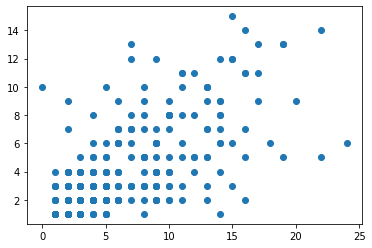

In [138]:
import matplotlib.pyplot as plt

# circuitId: 6 is monaco
x = df[(df.circuitId == 6) & (df.status == 'Finished')].grid

# using positionOrder here because it takes into account finishing position of DNFs
y = df[(df.circuitId == 6) & (df.status == 'Finished')].positionOrder

plt.scatter(x,y)

b, a = np.polyfit(x, y, deg=1)

print("Correlation:", x.corr(y))


We can see that there is a moderate positive correlation between a drivers starting position and finishing position at Monaco. This is most likely due to all the other variables of racing like crashes and pit strategies that mix up the grid from qualifying order.

### How Important Is Starting From 1st?



(array([566.,  64.,  31.,  11.,   8.,   8.,   4.,   0.,   0.,   2.]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

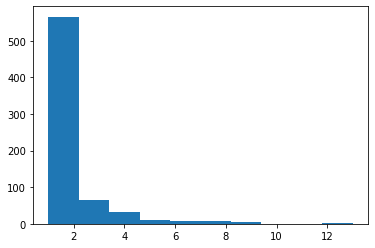

In [139]:
x = df[(df.grid == 1) & (df.status == 'Finished')].positionOrder
plt.hist(x)

In [140]:
x.mean()

1.802593659942363

From the figure above and a mean finishing position of 1.8 if the driver started from 1st, we can make the conclusion that qualifying position is vital for winning a race.

## Grand Prix Locations
Formula 1 has been running since the 1950s, in this time the sport has grown from a total of 7 Grand Proxs in a championship to 19 - 20 Grand Prixs located all around the world. Below is a map showing every circuit F1 has visited since the 1950s.

In [141]:
import folium

circuits_df = pd.read_csv('./data/circuits.csv')

coords = []

# plotting all circuits F1 has raced at in the world
for lat,lng in zip(circuits_df['lat'],circuits_df['lng']):
    coords.append([lat,lng])
maps = folium.Map(zoom_start=2,tiles='OpenStreetMap')  #map_types (Stamen Terrain, Stamen Toner, Mapbox Bright, cartodbpositron)
for i,j in zip(coords,circuits_df.name):
    marker = folium.Circle(
        location=i,
        radius=1000,
        popup="<strong>{0}</strong>".format(j))  #strong is used to bold the font (optional)
    marker.add_to(maps)
maps

# Machine Learning Model

### Regression

Processing the data into and x and y set. x will contain all our data used to predict y, which is the finishing position. We are only going to look at races after 1990 as there are major gaps in the data before then.

### Data Splitting
Splitting the data so that training is F1 seasons after 1990 and before 2021 (exlusive). We will test the data on the 2021 season and begining of the 2022 season.


In [142]:

# filter data for only Finished results after 1990 and before 2020

x_train = df[(df.status == 'Finished') & (df.year > 1990) & (df.year < 2021)]

# only keep numerical columns
x_train = x_train.select_dtypes(['number'])

x_train.drop(['resultId', 'positionOrder', 'points'], axis=1, inplace=True)

x_train.head()



,raceId,driverId,grid,laps,timetaken_in_millisec,fastestLap,max_speed,constructor_points,constructor_position,constructor_race_wins,year,round,circuitId,age
0,18,1,1,58,5690616.0,39.0,218.300,14.0,1,1,2008,1,1,38.0
1,19,1,9,56,5525103.0,53.0,209.033,24.0,1,1,2008,2,2,38.0
2,21,1,5,66,5903238.0,20.0,204.323,34.0,3,1,2008,4,4,38.0
3,22,1,3,58,5213230.0,31.0,222.085,42.0,3,1,2008,5,5,38.0
4,23,1,3,76,7242742.0,71.0,153.152,53.0,2,2,2008,6,6,38.0


In [143]:
x_test = df[(df.status == 'Finished') & (df.year == 2021)]
x_test = x_test.select_dtypes(['number'])

x_test.drop(['resultId', 'positionOrder', 'points'], axis=1, inplace=True)

x_test.head()

,raceId,driverId,grid,laps,timetaken_in_millisec,fastestLap,max_speed,constructor_points,constructor_position,constructor_race_wins,year,round,circuitId,age
792,1052,817,6,56,5589901.0,36.0,205.233,18.0,3,0,2021,1,3,33.0
793,1053,817,6,63,7405818.0,54.0,222.739,41.0,3,0,2021,2,21,33.0
794,1054,817,16,66,5746790.0,64.0,204.310,53.0,3,0,2021,3,75,33.0
795,1055,817,7,66,5661448.0,60.0,205.612,65.0,3,0,2021,4,4,33.0
796,1057,817,13,51,8025284.0,43.0,204.428,92.0,4,0,2021,6,73,33.0


In [144]:
y_train = df[(df.status == 'Finished') & (df.year > 1990) & (df.year < 2021)].positionOrder
y_train.head()

0    1
1    5
2    3
3    2
4    1
Name: positionOrder, dtype: int64

In [145]:
y_test = df[(df.status == 'Finished') & (df.year == 2021)].positionOrder

In [146]:

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor


scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)

In [147]:

def score_regression(model):
    score = 0
    for circuit in df[df.year == 2021]['round'].unique():
        test = df[(df['year'] == 2021) & (df['round'] == circuit)]
        x_test = test.select_dtypes(['number'])
        x_test.drop(['resultId', 'positionOrder', 'points'], axis=1, inplace=True)
        y_test = test.positionOrder

        # scaling the data
        x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

        # make predictions
        prediction_df = pd.DataFrame(model.predict(x_test), columns = ['results'])
        prediction_df['positionOrder'] = y_test.reset_index(drop = True)
        prediction_df['actual'] = prediction_df.positionOrder.map(lambda x: 1 if x == 1 else 0)
        prediction_df.sort_values('results', ascending = True, inplace = True)
        prediction_df.reset_index(inplace = True, drop = True)
        prediction_df['predicted'] = prediction_df.index
        prediction_df['predicted'] = prediction_df.predicted.map(lambda x: 1 if x == 0 else 0)

        print("Round", circuit)
        print(prediction_df[prediction_df.predicted != prediction_df.actual])

        score += precision_score(prediction_df.actual, prediction_df.predicted)

    model_score = score / df[df.year == 2021]['round'].unique().max()
    return model_score


### Model Building

Starting with linear regression.

In [148]:
comparison_dict ={'model':[],
                  'params': [],
                  'score': []}

In [149]:
# Linear Regression

params={'fit_intercept': ['True', 'False']}

for fit_intercept in params['fit_intercept']:
    model_params = (fit_intercept)
    model = LinearRegression(fit_intercept = fit_intercept)
    model.fit(x_train, y_train)
            
    model_score = score_regression(model)
            
    comparison_dict['model'].append('linear_regression')
    comparison_dict['params'].append(model_params)
    comparison_dict['score'].append(model_score)

Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.486545              2       0          1
1  4.439396              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.784663             18       0          1
3  4.631768              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.911204             16       0          1
1  3.578465              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.224800             19       0          1
1  4.243255              

In [150]:
pd.DataFrame(comparison_dict).groupby('model')['score'].max()

model
linear_regression    0.5
Name: score, dtype: float64

In [151]:
# Neural network

params={'hidden_layer_sizes': [(80,20,40,5), (75,30,50,10,3)], 
        'activation': ['identity', 'relu','logistic', 'tanh',], 
        'solver': ['lbfgs','sgd', 'adam'], 
        'alpha': np.logspace(-4,1,20)} 

for hidden_layer_sizes in params['hidden_layer_sizes']:
    for activation in params['activation']:
        for solver in params['solver']:
            for alpha in params['alpha']:
                model_params = (hidden_layer_sizes, activation, solver, alpha )
                model = MLPRegressor(hidden_layer_sizes = hidden_layer_sizes,
                                      activation = activation, solver = solver, alpha = alpha, random_state = 1)
                model.fit(x_train, y_train)

                model_score = score_regression(model)

                comparison_dict['model'].append('nn_regressor')
                comparison_dict['params'].append(model_params)
                comparison_dict['score'].append(model_score)

Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.486376              2       0          1
1  4.439245              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.784726             18       0          1
3  4.631679              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.911282             16       0          1
1  3.578475              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.225671             19       0          1
1  4.244094              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
   results  positionOrder  actual  predicted
0  3.46693              2       0          1
1  4.42608              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.759009             18       0          1
3  4.592854              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.913580             16       0          1
1  3.565694              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.136488             19       0          1
1  4.166608              1  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.454430              2       0          1
1  4.437619              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.771044             18       0          1
3  4.590603              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.910117             16       0          1
1  3.554619              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.104104             19       0          1
1  4.150021              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.437468              2       0          1
2  4.453930              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.786420             18       0          1
3  4.579682              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.903257             16       0          1
1  3.538510              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.064328             19       0          1
1  4.134298              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
    results  positionOrder  actual  predicted
0  1.881526              3       0          1
1  2.252136              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  4.019835              3       0          1
3  4.534561              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  3.173431              3       0          1
2  3.650057              1       1          0
Round 14
    results  positionOrder  a

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.175149             18       0          1
2  4.323339              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.322596              2       0          1
1  2.690917              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.851175             12       0          1
3  2.751435              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.129248             20       0          1
4  5.203341              1       1          0
Round 12
Empty DataFrame
Columns: [results, positionOrder, actual, 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  4.077985             18       0          1
2  5.318028              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.155374              3       0          1
2  2.601922              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.728735             12       0          1
1  2.027523              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.883051              2       0          1
1  1.981241              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.393649             20       0          1
6  6.074727              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  2.320620              3       0          1
1  2.374407              1       1          0
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
    results  positionOrder  actual  predicted
0  1.664711              3       0          1
1  2.221591              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.692936              2       0          1
1  1.714169              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  2.715114             12       0          1
1  2.868377              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.841789              6       0          1
4  5.414450              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  1.721981              3       0          1
2  2.858529              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  6.190800             18       0          1
2  6.622468              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.605948              3       0          1
1  2.737083              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
     results  positionOrder  actual  predicted
0   1.650562             20       0          1
15  9.875309              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.2587

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.155026             11       0          1
2  3.860266              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.327993             18       0          1
2  2.907568              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
     results  positionOrder  actual  predicted
0   2.829068             20       0          1
11  7.347550              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.711875             19       0          1
1  1.749003           

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  4.395644             11       0          1
1  4.788823              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.185801             15       0          1
3  3.432600              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.069761              3       0          1
1  2.477781              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
     results  positionOrder  actual  predicted
0   2.924960             20       0          1
12  7.320077              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  2.1845

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  4.194562             18       0          1
5  7.824013              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.295973              3       0          1
1  2.648739              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.756768             16       0          1
9  6.840389              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.597855              3       0          1
2  2.711863              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  4.021927             11       0          1
8  6.755362              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.642651             12       0          1
1  2.880059              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.268264              3       0          1
1  2.522775              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.268304              2       0          1
9  6.663783              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.378626 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
     results  positionOrder  actual  predicted
0   4.213566             20       0          1
12  8.985029              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.374832              3       0          1
2  2.308225              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.828361             18       0          1
1  2.543224              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.418928             20       0          1
6  5.474954              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  2.3104

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.018278             18       0          1
3  2.807895              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.133999              2       0          1
1  2.452671              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.764624             16       0          1
8  6.594496              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  3.588799             19       0          1
2  4.595472              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.628810              6       0          1
2  3.229659              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.304389              3       0          1
2  1.742527              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  3.164730              2       0          1
1  3.384277              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.092196             20       0          1
2  4.221354              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.629025 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.224464              2       0          1
3  4.384115              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  1.892467              2       0          1
1  2.589809              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.996199             20       0          1
6  5.280879              1       1          0
Round 12
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 14
    results  positionOrder  a

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.923759             18       0          1
4  5.280202              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.485830             12       0          1
5  2.454614              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.790635              2       0          1
1  1.950135              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
     results  positionOrder  actual  predicted
0   3.725713              5       0          1
13  8.586340              1       1          0
Round 12
   results  positionOrder  actual  predicted
0  1.08774

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  1.932224              2       0          1
2  2.148521              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.184914             18       0          1
7  7.859407              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.235382              3       0          1
2  2.836894              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.687766             12       0          1
1  2.947442              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
     results  positionOrder  actual  predicted
0   1.831200             20       0          1
13  9.806411              1       1          0
Round

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.117664             11       0          1
2  4.463545              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.844842              3       0          1
1  2.080607              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.007344             18       0          1
3  2.890499              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.258601              2       0          1
1  2.282686              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
     results  positionOrder  actual  predicted
0   1.890408             20       0          1
11  7.093434              1       1          0
Round

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.825712             11       0          1
4  4.469904              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.610016              3       0          1
2  2.630735              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.507655             15       0          1
2  3.377487              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.463882              2       0          1
1  2.514632              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  4.052089             20       0          1
8  6.310451              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  2.034613              5       0          1
1  2.179646              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.818189             18       0          1
9  7.136808              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.938913              3       0          1
1  1.939409              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.573447             15       0          1
7  4.699274              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.954638             16       0          1
5  5.482156              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  4.152531              2       0          1
7  8.159943              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.298985              2       0          1
1  2.342557              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.987470             12       0          1
1  2.263902              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
     results  positionOrder  actual  predicted
0   3.689827             20       0          1
13  9.971126              1       1          0
Round 12
   results  positionOrder  actual  predicted
0  1.03531

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.123334              2       0          1
4  3.075262              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.035517              3       0          1
3  2.924790              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.458018             15       0          1
4  2.843026              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
     results  positionOrder  actual  predicted
0   1.587055             20       0          1
11  6.985200              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.1577

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  4.877852             11       0          1
1  5.618722              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.856762              3       0          1
2  3.195591              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.970846              3       0          1
1  1.985507              1       1          0
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  1.932932              2       0          1
1  2.449836              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.887708             20       0          1
7  5.704252              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  4.988036             11       0          1
1  5.273680              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.022203              3       0          1
3  3.722399              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  1.892416              2       0          1
1  2.212039              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.985338             20       0          1
7  5.785384              1       1          0
Round 12
Empty DataFrame
Columns: [results, positionOrder, actual, 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  4.904250             11       0          1
1  5.405203              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.182448              3       0          1
2  3.234588              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.878859              3       0          1
1  1.937337              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  2.512228              8       0          1
3  2.747010              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.751136              2       0          1
1  2.517940              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.665223             20       0       

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  4.984262             11       0          1
1  5.706287              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.269512              3       0          1
1  2.902217              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.946342              3       0          1
1  2.024224              1       1          0
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  1.625556              2       0          1
1  2.382021              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.720304             20       0          1
7  5.848451              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  4.860397             11       0          1
1  5.252972              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.687449              3       0          1
2  2.881620              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.717726              3       0          1
1  1.938024              1       1          0
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  1.709302              2       0          1
1  2.553598              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.521667             20       0          1
7  5.915404              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.492912              5       0          1
1  2.497390              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  4.771098             11       0          1
1  5.094033              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.877715              3       0          1
3  3.209459              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.547635              8       0          1
1  2.553391              1       1          0
Round 7
   results  positionOrder  actual  predicted
0  1.97732              2       0          1
1  2.30957              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.744876             20       0          

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  4.921609             11       0          1
1  5.460701              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.135516              3       0          1
1  2.620425              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.823635              3       0          1
1  2.130729              1       1          0
Round 6
   results  positionOrder  actual  predicted
0  2.64782             12       0          1
2  2.72861              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.614218              2       0          1
1  2.499899              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.795131             20       0          

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  4.999885             11       0          1
1  5.664797              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.312750              3       0          1
2  3.377134              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.987780              3       0          1
1  2.098374              1       1          0
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  1.709648              2       0          1
1  2.389079              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.746394             20       0          1
7  5.802468              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  4.838618             11       0          1
1  5.322898              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.239131              3       0          1
2  3.206738              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  1.722027              2       0          1
1  2.442976              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.854914             20       0          1
7  6.120163              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.064047 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  4.613667             11       0          1
1  4.969658              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.524395              3       0          1
3  2.884866              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.640688              3       0          1
1  1.999333              1       1          0
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  2.020062              2       0          1
1  2.451094              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.529174             20       0          1
7  5.966258              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  4.816116             11       0          1
1  5.605662              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.496837              3       0          1
3  2.815963              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.835030              3       0          1
1  1.913218              1       1          0
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  1.808023              2       0          1
1  2.560144              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.453885             20       0          1
7  6.019637              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  4.593580             11       0          1
1  5.403076              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.200035              3       0          1
2  3.293027              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.712322              3       0          1
1  1.871733              1       1          0
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  1.746927              2       0          1
1  2.248301              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.453656             20       0          1
6  5.558144              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  4.758375             11       0          1
1  5.134680              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.080828              3       0          1
2  3.410302              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.899483              3       0          1
1  1.914372              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  2.574160              8       0          1
1  2.596882              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.793107              2       0          1
1  2.404644              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  2.184924              3       0          1
1  2.251804              1       1          0
Round 10
    results  positionOrder  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  4.376354             11       0          1
1  5.211536              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.683512              3       0          1
2  2.929284              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.928632              3       0          1
1  1.990194              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  2.521197              4       0          1
2  2.701730              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.926578              2       0          1
1  2.070896              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.788592             20       0       

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  4.914584             11       0          1
1  5.411832              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.394938              3       0          1
3  2.602356              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.485779              4       0          1
1  2.700953              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.170733              2       0          1
1  2.288261              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.855771             20       0          1
9  6.167081              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.649744             11       0          1
1  4.611488              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.419245              3       0          1
2  2.417459              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.758761              3       0          1
1  1.819724              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  2.810262              4       0          1
2  3.019243              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.133912              2       0          1
1  2.188103              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.135981             20       0       

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  4.062350             11       0          1
1  4.637462              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.555851              3       0          1
2  2.433084              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.408987              3       0          1
1  1.847032              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  2.517709             18       0          1
1  2.751535              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.438796              2       0          1
1  2.541428              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.792186             20       0       

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.180596              5       0          1
2  2.369296              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.755351             11       0          1
1  4.420963              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.854586              3       0          1
2  2.242156              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.441818             18       0          1
1  2.910173              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.983005             20       0          1
4  4.998143              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.206121              5       0          1
1  2.351680              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.639961              2       0          1
2  4.210317              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.183037              3       0          1
1  2.364529              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.610724             18       0          1
2  3.690252              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.663383             20       0          1
3  4.399387              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.181242              2       0          1
2  3.606614              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.853433              3       0          1
1  2.229935              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.548814             18       0          1
3  3.770983              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.047167             20       0          1
3  3.889857              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.479752 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  5.639715              2       0          1
1  5.774511              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.757493              3       0          1
1  1.783101              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.937369             16       0          1
1  4.223687              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  0.030900             19       0          1
1  0.121461              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.364936              5       0          1
1  2.809857              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  5.935337              2       0          1
2  6.340637              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.071718              3       0          1
2  2.891847              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.569321              3       0          1
2  4.082250              1       1          0
Round 12
Empty DataFrame
Columns: [results, positionOrder, actual, 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  5.533324              2       0          1
2  6.416470              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.828437              3       0          1
1  2.466625              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.074726             20       0          1
3  4.189412              1       1          0
Round 12
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 14
    results  positionOrder  a

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  1.811411              5       0          1
1  1.965548              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.874075             18       0          1
2  5.844465              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.367052              3       0          1
1  1.955888              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.251081             16       0          1
3  5.198930              1       1          0
Round 12
Empty DataFrame
Columns: [results, positionOrder, actual, 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  1.951782              5       0          1
3  2.754733              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  4.042649              2       0          1
2  5.355656              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.379639              3       0          1
1  2.117120              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  2.210540              2       0          1
1  2.486092              1       1          0
Round 6
   results  positionOrder  actual  predicted
0  3.33147             18       0          1
1  3.71847              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 12
  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  5.161041             18       0          1
1  6.604701              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.717659              3       0          1
1  1.718532              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.084458             16       0          1
8  5.779619              1       1          0
Round 12
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 14
    results  positionOrder  a

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.024596              2       0          1
5  7.174421              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.649546              3       0          1
3  2.866924              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.169476             15       0          1
2  3.589989              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.504388              3       0          1
1  2.708346              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  4.380110             20       0          1
1  4.544451              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.398761              2       0          1
2  7.165257              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.138866              3       0          1
1  1.577906              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 12
    results  positionOrder  actual  predicted
0 -0.551745             19       0          1
1 -0.394381              1       1          0
Round 14
    results  positionOrder  a

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  5.778013              2       0          1
1  6.289254              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.017758              3       0          1
1  2.091077              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.217441             20       0          1
2  4.102180              1       1          0
Round 12
    results  positionOrder  actual  predicted
0 -0.198779             19       0          1
1 -0.173090              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.946717              2       0          1
2  5.578161              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  4.497935             18       0          1
7  5.441713              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.385014             16       0          1
3  4.864510              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  3.022689             19       0          1
2  3.383367              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  2.351603              2       0          1
1  2.649890              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.052148             15       0          1
1  3.347297              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.755715              3       0          1
1  1.943104              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.495025             15       0          1
2  4.207433              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.837185              3       0          1
2  2.185131              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.486499             20       0       

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  2.107506              2       0          1
2  2.468682              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  4.273711             11       0          1
2  4.474672              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.519451              3       0          1
1  2.951919              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.598562             18       0          1
3  4.593981              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.616845              3       0          1
2  2.044605              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.104883             20       0       

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  2.518073              5       0          1
2  2.690688              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.296925             11       0          1
1  3.385732              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.481357              3       0          1
1  2.781899              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.871255              3       0          1
1  1.900444              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  2.359333             15       0          1
3  4.144416              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.638714              3       0          1
2  1.973674              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  2.137891              2       0          1
2  2.439101              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.170406             11       0          1
2  3.367676              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.291046              3       0          1
1  2.072037              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.807962              3       0          1
1  1.917295              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  2.344904             18       0          1
2  3.643946              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.823676              3       0          1
1  1.986749              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  2.364405              2       0          1
1  2.504023              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  4.407838             11       0          1
1  4.729362              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.666057              3       0          1
2  3.046532              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.063753             18       0          1
1  3.313341              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.862423              4       0          1
2  2.007265              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.006435             20       0       

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  2.220039              2       0          1
3  2.740506              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.936098             11       0          1
1  4.286015              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.840510              3       0          1
1  2.392886              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.883579              3       0          1
1  2.021134              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  2.657136             15       0          1
2  4.328556              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.978575              4       0          1
2  2.487673              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  2.600814              2       0          1
1  3.005023              1       1          0
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
    results  positionOrder  actual  predicted
0  1.646609              3       0          1
1  2.122440              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.694286              2       0          1
1  1.992721              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  2.596492             15       0          1
2  4.366987              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.866469              4       0          1
2  1.945398              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.457501             20       0       

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  2.202701              2       0          1
2  2.965573              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.629184             11       0          1
2  4.596367              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.677865              3       0          1
1  2.398895              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.590818             15       0          1
2  3.447253              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.009794              3       0          1
3  3.069800              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.018890             20       0       

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  1.994853              2       0          1
2  2.764326              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.428673             11       0          1
1  3.700887              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.495967              3       0          1
1  1.959106              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.820193              2       0          1
1  1.865965              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  2.352485             15       0          1
6  4.891023              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.512934             20       0       

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  2.134442              2       0          1
3  2.596585              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  4.060623             11       0          1
1  4.072479              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.751567              3       0          1
1  2.285910              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.911884              2       0          1
1  1.982246              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  2.403699             18       0          1
3  4.581662              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.832328              3       0          1
1  1.853078              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  2.348316              2       0          1
2  2.730818              1       1          0
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
    results  positionOrder  actual  predicted
0  1.387834              3       0          1
2  3.243081              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.385053             18       0          1
2  3.652168              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.551734             20       0          1
8  6.085407              1       1          0
Round 12
Empty DataFrame
Columns: [results, positionOrder, actual, 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  2.385739              2       0          1
3  2.763134              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.185315             11       0          1
1  3.253372              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.793740              3       0          1
1  1.923416              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.199161             18       0          1
5  4.705850              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.480012              3       0          1
2  4.043040              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.579713             11       0          1
1  3.626815              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.606768              3       0          1
1  2.274170              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
   results  positionOrder  actual  predicted
0  2.20911             18       0          1
2  4.69890              1       1          0
Round 7
   results  positionOrder  actual  predicted
0  1.83604              2       0          1
1  2.24919              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.912945             20       0          1
3  4.281891              1       1          0
Round 12
Empty

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  1.971409              3       0          1
1  2.135285              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.218170             11       0          1
1  3.821253              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.768038              3       0          1
1  2.162080              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.129020             18       0          1
2  3.483332              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.100952             20       0          1
3  4.505792              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  1.993329              2       0          1
2  2.238849              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.246831             11       0          1
1  3.529014              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.424054              3       0          1
2  2.408704              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.645785             18       0          1
3  4.324622              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.566121             20       0          1
3  4.087118              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
    results  positionOrder  actual  predicted
0  1.909779              3       0          1
1  2.246094              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.368499             18       0          1
2  3.325094              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.290310             20       0          1
2  5.074839              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.563444             19       0          1
1  1.875143              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.459272              2       0          1
2  4.359603              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.180214              3       0          1
1  1.463525              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.456383             18       0          1
1  3.218267              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.027399              2       0          1
1  2.628908              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.998186             16       0          1
2  3.960026              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.335328              2       0          1
2  3.438930              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.542844              3       0          1
1  2.129070              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.506517             18       0          1
4  4.256716              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.320977             20       0          1
2  3.392456              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.201824 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.128747              2       0          1
2  3.787527              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.548090              3       0          1
1  1.986144              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.542026             18       0          1
3  3.952620              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.396059             16       0          1
1  3.326405              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.995151 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.939674              2       0          1
2  3.781162              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.923075              3       0          1
1  2.260967              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.955212             18       0          1
3  4.254362              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.621811             16       0          1
1  3.499263              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.650331 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  5.490598              2       0          1
3  5.491570              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  5.490736             15       0          1
2  5.491477              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  5.490202              2       0          1
1  5.490627              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  5.489981              4       0          1
1  5.490211              1       1          0
Round 10
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 12
    results  positionOrder  actual  predicted
0  5.489287 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  5.487447              2       0          1
3  5.487922              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  5.487508             15       0          1
2  5.487878              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  5.487233              2       0          1
1  5.487444              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  5.487101              4       0          1
1  5.487222              1       1          0
Round 10
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 12
    results  positionOrder  actual  predicted
0  5.486740 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  5.482372              2       0          1
3  5.482508              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  5.482385             15       0          1
2  5.482495              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  5.482299              2       0          1
1  5.482362              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  5.482249              4       0          1
1  5.482288              1       1          0
Round 10
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 12
    results  positionOrder  actual  predicted
0  5.482137 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  5.475041             15       0          1
3  5.475057              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  5.475041             18       0          1
3  5.475055              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  5.475030              2       0          1
1  5.475038              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  5.475021              4       0          1
1  5.475027              1       1          0
Round 10
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 12
    results  positionOrder  actual  predicted
0  5.475006 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  5.466369             15       0          1
5  5.466370              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
     results  positionOrder  actual  predicted
0   5.466369             18       0          1
10  5.466370              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  5.466369              2       0          1
3  5.466369              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  5.466369              4       0          1
1  5.466369              1       1          0
Round 10
   results  positionOrder  actual  predicted
0  5.46637             19       0          1
1  5.46637              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.654148              5       0          1
2  3.091602              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.475003              2       0          1
2  4.236383              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.183686              3       0          1
1  2.483158              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.554345             18       0          1
2  4.514771              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.121360             16       0          1
3  3.261676              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.652478              5       0          1
2  3.076436              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.459441              2       0          1
2  4.200626              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.181069              3       0          1
1  2.484043              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.568247             18       0          1
2  4.522555              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.119635             16       0          1
3  3.315667              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.591435              5       0          1
2  3.134273              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.522911              2       0          1
2  4.169411              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.167726              3       0          1
1  2.531411              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.528271             18       0          1
2  4.509730              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.112879             16       0          1
3  3.373582              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.555195              5       0          1
2  3.117690              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.463299              2       0          1
2  4.069409              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.186161              3       0          1
1  2.542489              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.497424             18       0          1
2  4.502292              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.124274             16       0          1
3  3.268043              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.600873              5       0          1
2  3.155301              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.282742              2       0          1
2  3.788308              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.197789              3       0          1
1  2.488658              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.471991             18       0          1
2  4.349080              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.133412             16       0          1
3  3.262220              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.544887              5       0          1
2  3.167980              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.327924              2       0          1
2  3.733917              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.225247              3       0          1
1  2.579126              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.489920             18       0          1
2  4.401391              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.139032             16       0          1
3  3.239933              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.663288              5       0          1
2  3.176022              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.196971              2       0          1
2  3.618618              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.391059              3       0          1
1  2.705651              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.728564             18       0          1
2  4.438141              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.249875             16       0          1
3  3.167492              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.741258              5       0          1
2  3.266143              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.231584              2       0          1
2  3.625855              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.428485              3       0          1
1  2.773974              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.815364             18       0          1
2  4.398034              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.256079             16       0          1
3  3.231911              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.738997              5       0          1
2  3.354690              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.209915              2       0          1
2  3.522032              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.349600              3       0          1
1  2.720155              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.738420             18       0          1
2  4.416192              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.177708             16       0          1
3  3.339382              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.861311              5       0          1
2  3.492612              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.315858              2       0          1
2  3.639600              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.300625              3       0          1
1  2.637582              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.675596             18       0          1
3  4.451644              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.173492             16       0          1
3  3.527267              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.952996              5       0          1
2  3.537899              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.287438              2       0          1
2  3.599678              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.323999              3       0          1
1  2.655476              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.678280             18       0          1
3  4.379683              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.171356             16       0          1
3  3.491972              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  3.017112              5       0          1
2  3.555998              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.373387              2       0          1
2  3.807323              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.338068              3       0          1
1  2.695701              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.825632             18       0          1
3  4.523375              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.138040             16       0          1
2  3.579037              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  3.194314              5       0          1
2  3.569422              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.409382              2       0          1
2  3.939994              1       1          0
Round 3
   results  positionOrder  actual  predicted
0  2.60549              3       0          1
1  2.90690              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.108667             18       0          1
2  4.601115              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.239177             16       0          1
2  3.444650              1       1          0
Round 12
  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  3.178174              5       0          1
2  3.473333              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.499171              2       0          1
2  4.179119              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.800983              3       0          1
1  2.904429              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.229896             18       0          1
3  5.007578              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.608874             16       0          1
2  3.458994              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  5.487444              2       0          1
3  5.487445              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  5.487444             15       0          1
2  5.487445              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  5.487444              2       0          1
1  5.487445              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  5.487444              6       0          1
1  5.487444              1       1          0
Round 10
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 12
    results  positionOrder  actual  predicted
0  5.487444 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  5.480325              2       0          1
3  5.480325              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  5.480325             15       0          1
2  5.480325              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  5.480325              2       0          1
1  5.480325              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  5.480325              6       0          1
1  5.480325              1       1          0
Round 10
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 12
    results  positionOrder  actual  predicted
0  5.480325 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  5.477969              2       0          1
3  5.477969              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  5.477969             15       0          1
3  5.477969              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  5.477969              2       0          1
1  5.477969              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  5.477969              4       0          1
1  5.477969              1       1          0
Round 10
    results  positionOrder  actual  predicted
0  5.477969             20       0          1
1  5.477969              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  5.472381              2       0          1
2  5.472381              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  5.472381             15       0          1
2  5.472381              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  5.472381              2       0          1
1  5.472381              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 12
    results  positionOrder  actual  predicted
0  5.472381              3       0          1
2  5.472381              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  5.464621              2       0          1
3  5.464621              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  5.464621             15       0          1
1  5.464621              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  5.464621              2       0          1
1  5.464621              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  5.464621              4       0          1
2  5.464621              1       1          0
Round 10
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 12
    results  positionOrder  actual  predicted
0  5.464621 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  5.452169              2       0          1
2  5.452169              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  5.452169             15       0          1
2  5.452169              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  5.452169              2       0          1
1  5.452169              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  5.452169              4       0          1
1  5.452169              1       1          0
Round 10
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 12
    results  positionOrder  actual  predicted
0  5.452169 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  1.162416             18       0          1
3  3.139121              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
    results  positionOrder  actual  predicted
0  1.063044              3       0          1
1  2.136036              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  1.456420              6       0          1
8  3.943183              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.233168              3       0          1
2  2.998008              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.500643             20       0          1
2  4.998456              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.163609              6       0          1
3  3.818857              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  0.717545              3       0          1
1  1.876356              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  0.922866              3       0          1
1  1.859993              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  1.790983             15       0          1
3  2.708139              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.975355              3       0          1
2  2.895089              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.483952             20       0       

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  0.439193             18       0          1
3  3.248064              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  0.017305              3       0          1
1  1.437909              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.133234              3       0          1
1  1.880107              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  1.249447             18       0          1
5  3.422908              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.455114              3       0          1
2  3.043590              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
   results  positionOrder  actual  predicted
0  1.89645             20       0         

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  1.400113             18       0          1
4  4.436006              1       1          0
Round 3
    results  positionOrder  actual  predicted
0 -0.013473              3       0          1
1  0.867615              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.293246              3       0          1
1  2.206078              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  1.112449              6       0          1
6  3.351353              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.396346              3       0          1
2  3.166766              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.577937             20       0       

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  1.541589             18       0          1
3  3.839869              1       1          0
Round 3
    results  positionOrder  actual  predicted
0 -0.637561              3       0          1
1  0.178885              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.306131              3       0          1
1  1.817107              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  1.199377             18       0          1
5  3.024932              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.195213              3       0          1
1  2.921589              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  0.985791              6       0          1
1  1.123200              1       1          0
Round 10
    results  positionOrder  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.266573              6       0          1
3  3.666747              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  0.035773              3       0          1
1  1.376837              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.027290              3       0          1
2  1.574792              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  1.395675              6       0          1
2  1.804252              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.977354              3       0          1
2  2.736734              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  0.712507             20       0       

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.879845             18       0          1
4  4.623802              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  0.007527              3       0          1
1  0.293908              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  0.953196              3       0          1
2  1.909158              1       1          0
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  1.498168              2       0          1
2  2.671047              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.126275             20       0          1
4  5.443673              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.130807              6       0          1
3  3.913480              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  0.046016              3       0          1
1  1.125773              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  0.929075              3       0          1
2  2.198764              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  0.926724              6       0          1
8  3.686135              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.833330              3       0          1
1  2.660584              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.071572             20       0       

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.256777              6       0          1
5  3.995814              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  0.450537              3       0          1
1  1.241475              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  0.833650             18       0          1
5  2.009509              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.956520              3       0          1
2  3.133658              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.131718             20       0          1
2  5.130562              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.174408             18       0          1
3  2.947232              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  0.085303              3       0          1
1  1.546403              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.789089              3       0          1
1  2.151788              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  1.272125              6       0          1
6  3.158936              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.097852              3       0          1
2  3.067176              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.376377             16       0       

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  0.792446             18       0          1
4  4.347945              1       1          0
Round 3
    results  positionOrder  actual  predicted
0 -0.516090              3       0          1
1  0.583311              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.575708              3       0          1
1  1.609074              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  0.907582             18       0          1
3  2.323180              1       1          0
Round 7
   results  positionOrder  actual  predicted
0  1.79718              3       0          1
3  3.43236              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0 -1.624673             20       0          

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.733636              6       0          1
3  4.640220              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  0.269575              3       0          1
1  0.826333              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.392785              3       0          1
1  1.554914              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  1.157886             18       0          1
2  1.584256              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.980772              2       0          1
2  2.193326              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  1.224949              6       0          1
1  1.329263              1       1          0
Round 10
    results  positionOrder  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
    results  positionOrder  actual  predicted
0 -1.219849              3       0          1
1  0.198867              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.436758              3       0          1
1  1.595983              1       1          0
Round 6
   results  positionOrder  actual  predicted
0  0.34325             18       0          1
1  0.68796              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.550003              3       0          1
3  3.869128              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  0.300066             20       0          1
5  6.345826              1       1          0
Round 12
  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.617749              6       0          1
2  3.314900              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  0.114285              3       0          1
2  2.185733              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.377999              3       0          1
1  1.533970              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  0.562017             12       0          1
1  0.610114              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.748783              2       0          1
1  2.813024              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0 -0.301841             20       0       

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
    results  positionOrder  actual  predicted
0 -0.043080              3       0          1
1  1.128933              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  0.888862             12       0          1
2  1.505804              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.912533              3       0          1
2  3.455788              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  0.536426             20       0          1
5  5.855624              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  6.753792 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  1.495231             18       0          1
3  2.733569              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  0.634486              3       0          1
1  1.887339              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.030246              3       0          1
1  2.044073              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  1.864155             15       0          1
3  2.529257              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.680321              2       0          1
2  2.554452              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
   results  positionOrder  actual  predicted
0  0.35060             20       0         

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.429149             18       0          1
2  3.786848              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  0.581168              3       0          1
1  0.593069              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  0.743206             12       0          1
1  0.861927              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.702098              3       0          1
2  2.619106              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.150321             20       0          1
5  5.392418              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  1.190943             18       0          1
3  2.646600              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  0.770785              3       0          1
1  1.681995              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.344327             18       0          1
1  1.362222              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.669510              3       0          1
2  3.529115              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  0.125589             20       0          1
6  6.052002              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
    results  positionOrder  actual  predicted
0  1.624604              3       0          1
2  2.831949              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  3.589449              2       0          1
1  3.642430              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0 -0.156840             20       0          1
2  5.757802              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.038787              3       0          1
1  1.051232              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.272403              3       0          1
1  3.384418              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.527451              3       0          1
2  2.860216              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  2.345381              3       0          1
1  2.369706              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  0.676398             12       0          1
1  0.703823              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  0.442917             20       0          1
4  5.649581              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.028776             11       0          1
2  3.204946              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.173197              3       0          1
1  2.146383              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  3.045820              2       0          1
1  3.194679              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.039832             16       0          1
1  4.323227              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.810194 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.028785             11       0          1
2  3.204932              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.173254              3       0          1
1  2.146348              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  3.045825              2       0          1
1  3.194701              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.039842             16       0          1
1  4.323212              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.810222 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.028802             11       0          1
2  3.204905              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.173359              3       0          1
1  2.146283              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  3.045833              2       0          1
1  3.194741              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.039860             16       0          1
1  4.323183              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.810273 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.028832             11       0          1
2  3.204856              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.173551              3       0          1
1  2.146164              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  3.045849              2       0          1
1  3.194814              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.039892             16       0          1
1  4.323130              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.810366 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.028886             11       0          1
2  3.204766              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.173903              3       0          1
1  2.145946              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  3.045879              2       0          1
1  3.194949              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.039952             16       0          1
1  4.323034              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.810538 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.028987             11       0          1
2  3.204600              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.174547              3       0          1
1  2.145547              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  3.045933              2       0          1
1  3.195197              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.040061             16       0          1
1  4.322857              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.810851 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.029169             11       0          1
2  3.204297              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.175726              3       0          1
1  2.144816              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  3.046034              2       0          1
1  3.195650              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.040260             16       0          1
1  4.322531              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.811425 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.029502             11       0          1
2  3.203742              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.177881              3       0          1
1  2.143479              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  3.046225              2       0          1
1  3.196481              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.040624             16       0          1
1  4.321929              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.812471 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.030102             11       0          1
2  3.202725              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.181808              3       0          1
1  2.141039              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  3.046592              2       0          1
1  3.198004              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.041286             16       0          1
1  4.320810              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.814372 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.031174             11       0          1
2  3.200861              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.188934              3       0          1
1  2.136605              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  3.047326              2       0          1
1  3.200789              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.042481             16       0          1
1  4.318707              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.817795 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.033042             11       0          1
2  3.197448              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.201747              3       0          1
1  2.128623              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  3.048871              2       0          1
1  3.205855              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.044605             16       0          1
1  4.314668              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.823840 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.036152             11       0          1
2  3.191196              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.224392              3       0          1
1  2.114610              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  3.052368              2       0          1
1  3.214880              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.048264             16       0          1
1  4.306633              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.834025 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.040847             11       0          1
2  3.179716              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.263075              3       0          1
1  2.091730              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
   results  positionOrder  actual  predicted
0  3.06087              2       0          1
1  3.22978              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.054210             16       0          1
1  4.289734              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.849178    

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.046626             11       0          1
2  3.158666              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.325075              3       0          1
1  2.063031              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  3.081737              2       0          1
1  3.247833              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.063398             16       0          1
1  4.251976              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.864832 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.057322             11       0          1
2  3.127050              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.417658              3       0          1
1  2.064673              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  3.122894              2       0          1
1  3.242845              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.079278             16       0          1
1  4.168265              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.867175 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.146913             11       0          1
2  3.153666              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.581689              3       0          1
1  2.180036              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  3.151955              2       0          1
1  3.165162              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.097689             16       0          1
1  3.995996              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.845772 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.418767              2       0          1
1  3.477825              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.873139              3       0          1
1  2.284430              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.060067             16       0          1
1  3.629363              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.639429             19       0          1
1  5.095107              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
    results  positionOrder  actual  predicted
0  1.924726              3       0          1
1  2.286904              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.950381             16       0          1
2  3.453509              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.121967             19       0          1
1  4.536873              1       1          0
Round 14
    results  positionOrder  a

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.787753             11       0          1
1  3.798761              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.943538              3       0          1
1  2.335720              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.948511             18       0          1
1  3.496260              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.952166             16       0          1
2  3.655754              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  3.165614 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.980172              2       0          1
2  3.523337              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.271202              3       0          1
1  2.545458              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.769580             18       0          1
3  3.858254              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.600802             16       0          1
2  3.501569              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  2.563585 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.185839              3       0          1
1  2.410051              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.406292              2       0          1
2  5.320601              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
    results  positionOrder  actual  predicted
0  2.350080              2       0          1
1  2.401282              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.125603             18       0          1
2  3.773766              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.568390              2       0          1
2  3.277589              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  1.739973              3       0          1
1  2.276203              1       1          0
Round 10
    results  positionOrder  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.185895              3       0          1
1  2.410168              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.406166              2       0          1
2  5.320453              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
    results  positionOrder  actual  predicted
0  2.350086              2       0          1
1  2.401391              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.125070             18       0          1
2  3.774229              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.568289              2       0          1
2  3.277124              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  1.740037              3       0          1
1  2.276047              1       1          0
Round 10
    results  positionOrder  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.186000              3       0          1
1  2.410383              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.405935              2       0          1
2  5.320183              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
    results  positionOrder  actual  predicted
0  2.350098              2       0          1
1  2.401590              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.124095             18       0          1
2  3.775080              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.568104              2       0          1
2  3.276272              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  1.740154              3       0          1
1  2.275763              1       1          0
Round 10
    results  positionOrder  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.186195              3       0          1
1  2.410779              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.405511              2       0          1
2  5.319691              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
    results  positionOrder  actual  predicted
0  2.350120              2       0          1
1  2.401957              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.122308             18       0          1
2  3.776644              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.567763              2       0          1
2  3.274706              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  1.740364              3       0          1
1  2.275239              1       1          0
Round 10
    results  positionOrder  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
   results  positionOrder  actual  predicted
0  2.18656              3       0          1
1  2.41151              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.404736              2       0          1
2  5.318800              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
    results  positionOrder  actual  predicted
0  2.350167              2       0          1
1  2.402636              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.119040             18       0          1
2  3.779521              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.567129              2       0          1
2  3.271824              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  1.740742              3       0          1
1  2.274277              1       1          0
Round 10
    results  positionOrder  act

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.187255              3       0          1
1  2.412867              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.403318              2       0          1
2  5.317208              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
    results  positionOrder  actual  predicted
0  2.350272              2       0          1
1  2.403899              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.113071             18       0          1
2  3.784833              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.565940              2       0          1
2  3.266499              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  1.741402              3       0          1
1  2.272501              1       1          0
Round 10
    results  positionOrder  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.188623              3       0          1
1  2.415420              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.400722              2       0          1
2  5.314419              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
    results  positionOrder  actual  predicted
0  2.350530              2       0          1
1  2.406281              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.102210             18       0          1
2  3.794701              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.563668              2       0          1
2  3.256594              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  1.742496              3       0          1
1  2.269209              1       1          0
Round 10
    results  positionOrder  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.191459              3       0          1
1  2.420320              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.395975              2       0          1
2  5.309737              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
    results  positionOrder  actual  predicted
0  2.351256              2       0          1
1  2.410887              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.082586             18       0          1
2  3.813231              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.559181              2       0          1
2  3.237940              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  1.744052              3       0          1
1  2.263075              1       1          0
Round 10
    results  positionOrder  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.197899              3       0          1
1  2.430121              1       1          0
Round 2
   results  positionOrder  actual  predicted
0  3.38727              2       0          1
2  5.30253              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
    results  positionOrder  actual  predicted
0  2.353648              2       0          1
1  2.420242              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.047721             18       0          1
2  3.848716              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.549793              2       0          1
2  3.201986              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  1.745039              3       0          1
1  2.251593              1       1          0
Round 10
    results  positionOrder  act

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.215192              3       0          1
1  2.451402              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.371014              2       0          1
2  5.293063              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
    results  positionOrder  actual  predicted
0  2.363248              2       0          1
1  2.441366              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  2.988664             18       0          1
2  3.919403              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.528560              2       0          1
1  3.129714              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  1.739161              3       0          1
1  2.230119              1       1          0
Round 10
    results  positionOrder  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.275206              3       0          1
1  2.505324              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.337746              2       0          1
2  5.282258              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
    results  positionOrder  actual  predicted
0  2.402381              2       0          1
2  2.500512              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  2.904155             18       0          1
2  4.073235              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.487448              2       0          1
1  2.978992              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  1.725483              3       0          1
1  2.183317              1       1          0
Round 10
    results  positionOrder  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.387305              3       0          1
1  2.621944              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.250466              2       0          1
2  5.251785              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
    results  positionOrder  actual  predicted
0  2.437159              2       0          1
2  2.631876              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  2.861976             18       0          1
4  4.431584              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.461252              2       0          1
1  2.714888              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  1.822941              3       0          1
1  2.069613              1       1          0
Round 10
    results  positionOrder  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.506378              3       0          1
1  2.774147              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.170792              2       0          1
1  4.911297              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
    results  positionOrder  actual  predicted
0  2.242652              2       0          1
2  2.687874              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  2.781252             15       0          1
5  4.933625              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.293566             20       0          1
2  6.441989              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.724221              3       0          1
1  2.958915              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.944682              2       0          1
1  4.449607              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
    results  positionOrder  actual  predicted
0  2.066308              3       0          1
2  2.545405              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  2.651886             18       0          1
3  3.511290              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  0.802016             20       0          1
3  7.247882              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.594266              2       0          1
1  4.696651              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.679758             18       0          1
1  3.304042              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.536746             20       0          1
2  6.465934              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  0.547355             19       0          1
1  0.822973              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.510853              2       0          1
1  3.627703              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.791376             18       0          1
1  2.938069              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.839712             20       0          1
2  5.672640              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.190899             19       0          1
1  1.520713              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.645908              2       0          1
2  4.108370              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.407916              3       0          1
1  2.049328              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.475758              4       0          1
3  4.298341              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.287859             16       0          1
1  4.211087              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  3.319308 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.018459              2       0          1
2  3.781865              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.862452              3       0          1
1  2.290147              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.151812             18       0          1
3  4.616170              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.047781             16       0          1
2  3.975794              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  3.117787 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.992932              2       0          1
2  3.637444              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.000563              3       0          1
1  2.426180              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.680845             18       0          1
3  4.021543              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.691280             16       0          1
2  3.511169              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  2.664807 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.516188              2       0          1
1  4.473380              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.770511             18       0          1
3  4.594807              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.937441             16       0          1
1  3.596111              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.184494             19       0          1
1  4.212054              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.486833              2       0          1
1  4.456838              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.762276             18       0          1
3  4.576344              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.910183             16       0          1
1  3.564370              1       1          0
Round 12
   results  positionOrder  actual  predicted
0  4.16970             19       0          1
1  4.20434              1  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.458579              2       0          1
1  4.444912              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.759596             18       0          1
3  4.558739              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.887819             16       0          1
1  3.538514              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.149368             19       0          1
1  4.196365              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.435485              2       0          1
2  4.449571              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.767855             18       0          1
3  4.543463              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.874175             16       0          1
1  3.518654              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.113182             19       0          1
1  4.181465              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.553951              2       0          1
1  4.492132              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.797571             18       0          1
3  4.619512              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.970345             16       0          1
1  3.635254              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.167422             19       0          1
1  4.194544              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.548423              2       0          1
1  4.504497              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.798679             18       0          1
3  4.617814              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.967941             16       0          1
1  3.621399              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.155979             19       0          1
1  4.187013              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.528258              2       0          1
1  4.502879              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.798706             18       0          1
3  4.608536              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.950499             16       0          1
1  3.594194              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.147058             19       0          1
1  4.185334              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.503956              2       0          1
1  4.496201              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.797638             18       0          1
3  4.591298              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.929324             16       0          1
1  3.568167              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.131499             19       0          1
1  4.182726              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.485088              2       0          1
2  4.504057              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.805991             18       0          1
3  4.573794              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.917441             16       0          1
1  3.550596              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  4.097631             19       0          1
1  4.171018              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   5.501435              7       0          1
16  5.501435              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  5.501435              6       0          1
9  5.501435              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   5.501435              9       0          1
16  5.501435              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   5.501435              6       0          1
17  5.501435              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  5.501435              9       0          1
8  5.501435              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   5.501435              6       0          1
11  5.501435              1       1          0
Round 9
     results  positionOrder  actual  predicted
0   5.501435              7       0          1
11  5.5014

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   5.501418              7       0          1
16  5.501418              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  5.501418              6       0          1
9  5.501418              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   5.501418              9       0          1
16  5.501418              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   5.501418              6       0          1
17  5.501418              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  5.501418              9       0          1
8  5.501418              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   5.501418              6       0          1
11  5.501418              1       1          0
Round 9
     results  positionOrder  actual  predicted
0   5.501418              7       0          1
11  5.5014

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   5.501414              7       0          1
16  5.501414              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  5.501414              6       0          1
9  5.501414              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   5.501414              9       0          1
16  5.501414              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   5.501414              6       0          1
17  5.501414              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  5.501414              9       0          1
8  5.501414              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   5.501414              6       0          1
11  5.501414              1       1          0
Round 9
     results  positionOrder  actual  predicted
0   5.501414              7       0          1
11  5.5014

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   5.501414              7       0          1
16  5.501414              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  5.501414              6       0          1
9  5.501414              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   5.501414              9       0          1
16  5.501414              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   5.501414              6       0          1
17  5.501414              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  5.501414              9       0          1
8  5.501414              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   5.501414              6       0          1
11  5.501414              1       1          0
Round 9
     results  positionOrder  actual  predicted
0   5.501414              7       0          1
11  5.5014

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   5.501414              7       0          1
16  5.501414              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  5.501414              6       0          1
9  5.501414              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   5.501414              9       0          1
16  5.501414              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   5.501414              6       0          1
17  5.501414              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  5.501414              9       0          1
8  5.501414              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   5.501414              6       0          1
11  5.501414              1       1          0
Round 9
     results  positionOrder  actual  predicted
0   5.501414              7       0          1
11  5.5014

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   5.501414              7       0          1
16  5.501414              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  5.501414              6       0          1
9  5.501414              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   5.501414              9       0          1
16  5.501414              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   5.501414              6       0          1
17  5.501414              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  5.501414              9       0          1
8  5.501414              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   5.501414              6       0          1
11  5.501414              1       1          0
Round 9
     results  positionOrder  actual  predicted
0   5.501414              7       0          1
11  5.5014

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   5.501414              7       0          1
16  5.501414              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  5.501414              6       0          1
9  5.501414              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   5.501414              9       0          1
16  5.501414              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   5.501414              6       0          1
17  5.501414              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  5.501414              9       0          1
8  5.501414              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   5.501414              6       0          1
11  5.501414              1       1          0
Round 9
     results  positionOrder  actual  predicted
0   5.501414              7       0          1
11  5.5014

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   3.566078              7       0          1
16  3.566078              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.566078              6       0          1
9  3.566078              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   3.566078              9       0          1
16  3.566078              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   3.566078              6       0          1
17  3.566078              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.566078              9       0          1
8  3.566078              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   3.566078              6       0          1
11  3.566078              1       1          0
Round 9
     results  positionOrder  actual  predicted
0   3.566078              7       0          1
11  3.5660

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   3.566078              7       0          1
16  3.566078              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.566078              6       0          1
9  3.566078              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   3.566078              9       0          1
16  3.566078              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   3.566078              6       0          1
17  3.566078              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.566078              9       0          1
8  3.566078              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   3.566078              6       0          1
11  3.566078              1       1          0
Round 9
     results  positionOrder  actual  predicted
0   3.566078              7       0          1
11  3.5660

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   3.566078              7       0          1
16  3.566078              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.566078              6       0          1
9  3.566078              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   3.566078              9       0          1
16  3.566078              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   3.566078              6       0          1
17  3.566078              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.566078              9       0          1
8  3.566078              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   3.566078              6       0          1
11  3.566078              1       1          0
Round 9
     results  positionOrder  actual  predicted
0   3.566078              7       0          1
11  3.5660

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   3.566078              7       0          1
16  3.566078              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.566078              6       0          1
9  3.566078              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   3.566078              9       0          1
16  3.566078              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   3.566078              6       0          1
17  3.566078              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.566078              9       0          1
8  3.566078              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   3.566078              6       0          1
11  3.566078              1       1          0
Round 9
     results  positionOrder  actual  predicted
0   3.566078              7       0          1
11  3.5660

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   3.566078              7       0          1
16  3.566078              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.566078              6       0          1
9  3.566078              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   3.566078              9       0          1
16  3.566078              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   3.566078              6       0          1
17  3.566078              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.566078              9       0          1
8  3.566078              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   3.566078              6       0          1
11  3.566078              1       1          0
Round 9
     results  positionOrder  actual  predicted
0   3.566078              7       0          1
11  3.5660

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   3.566078              7       0          1
16  3.566078              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.566078              6       0          1
9  3.566078              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   3.566078              9       0          1
16  3.566078              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   3.566078              6       0          1
17  3.566078              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.566078              9       0          1
8  3.566078              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   3.566078              6       0          1
11  3.566078              1       1          0
Round 9
     results  positionOrder  actual  predicted
0   3.566078              7       0          1
11  3.5660

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   3.566078              7       0          1
16  3.566078              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.566078              6       0          1
9  3.566078              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   3.566078              9       0          1
16  3.566078              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   3.566078              6       0          1
17  3.566078              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.566078              9       0          1
8  3.566078              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   3.566078              6       0          1
11  3.566078              1       1          0
Round 9
     results  positionOrder  actual  predicted
0   3.566078              7       0          1
11  3.5660

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   3.566078              7       0          1
16  3.566078              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.566078              6       0          1
9  3.566078              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   3.566078              9       0          1
16  3.566078              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   3.566078              6       0          1
17  3.566078              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.566078              9       0          1
8  3.566078              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   3.566078              6       0          1
11  3.566078              1       1          0
Round 9
     results  positionOrder  actual  predicted
0   3.566078              7       0          1
11  3.5660

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   3.566078              7       0          1
16  3.566078              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.566078              6       0          1
9  3.566078              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   3.566078              9       0          1
16  3.566078              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   3.566078              6       0          1
17  3.566078              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.566078              9       0          1
8  3.566078              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   3.566078              6       0          1
11  3.566078              1       1          0
Round 9
     results  positionOrder  actual  predicted
0   3.566078              7       0          1
11  3.5660

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   3.566078              7       0          1
16  3.566078              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.566078              6       0          1
9  3.566078              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   3.566078              9       0          1
16  3.566078              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   3.566078              6       0          1
17  3.566078              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.566078              9       0          1
8  3.566078              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   3.566078              6       0          1
11  3.566078              1       1          0
Round 9
     results  positionOrder  actual  predicted
0   3.566078              7       0          1
11  3.5660

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.273723              2       0          1
1  3.766959              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.373627              3       0          1
2  3.173247              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.070070             18       0          1
1  3.667858              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.902990             16       0          1
1  3.611643              1       1          0
Round 12
Empty DataFrame
Columns: [results, positionOrder, actual, 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.627066              6       0          1
9  3.627066              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  0.939538              3       0          1
2  2.620337              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.578439             18       0          1
8  3.627066              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
     results  positionOrder  actual  predicted
0   3.627066              5       0          1
16  3.627066              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  0.9894

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
   results  positionOrder  actual  predicted
0  3.62819              6       0          1
9  3.62819              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.279300              3       0          1
1  2.599944              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
   results  positionOrder  actual  predicted
0  3.62819              9       0          1
8  3.62819              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0   3.62819              5       0          1
16  3.62819              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  0.846804       

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.627952              6       0          1
9  3.627952              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.380804              3       0          1
1  3.065267              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.627952              9       0          1
8  3.627952              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
     results  positionOrder  actual  predicted
0   3.137018             20       0          1
16  3.627952              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  0.5201

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.267921              5       0          1
2  2.796989              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.624019              6       0          1
9  3.624019              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.675382              3       0          1
1  2.616719              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.492180             18       0          1
8  3.624019              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
     results  positionOrder  actual  predicted
0   3.357965             20       0          1
16  3.624019              1       1          0
Round

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   3.566077              7       0          1
16  3.566077              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.566077              6       0          1
9  3.566077              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   3.566077              9       0          1
16  3.566077              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   3.566077              6       0          1
17  3.566077              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.566077              9       0          1
8  3.566077              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   3.566077              6       0          1
11  3.566077              1       1          0
Round 9
     results  positionOrder  actual  predicted
0   3.566077              7       0          1
11  3.5660

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   3.566077              7       0          1
16  3.566077              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.566077              6       0          1
9  3.566077              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   3.566077              9       0          1
16  3.566077              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   3.566077              6       0          1
17  3.566077              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.566077              9       0          1
8  3.566077              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   3.566077              6       0          1
11  3.566077              1       1          0
Round 9
     results  positionOrder  actual  predicted
0   3.566077              7       0          1
11  3.5660

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   3.566076              7       0          1
16  3.566076              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.566076              6       0          1
9  3.566076              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   3.566076              9       0          1
16  3.566076              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   3.566076              6       0          1
17  3.566076              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.566076              9       0          1
8  3.566076              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   3.566076              6       0          1
11  3.566076              1       1          0
Round 9
     results  positionOrder  actual  predicted
0   3.566076              7       0          1
11  3.5660

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   3.566074              7       0          1
16  3.566074              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.566074              6       0          1
9  3.566074              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   3.566074              9       0          1
16  3.566074              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   3.566074              6       0          1
17  3.566074              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.566074              9       0          1
8  3.566074              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   3.566074              6       0          1
11  3.566074              1       1          0
Round 9
     results  positionOrder  actual  predicted
0   3.566074              7       0          1
11  3.5660

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   3.566067              7       0          1
16  3.566067              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.566067              6       0          1
9  3.566067              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   3.566067              9       0          1
16  3.566067              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   3.566067              6       0          1
17  3.566067              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  3.566067              9       0          1
8  3.566067              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   3.566067              6       0          1
11  3.566067              1       1          0
Round 9
     results  positionOrder  actual  predicted
0   3.566067              7       0          1
11  3.5660

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.071005             18       0          1
7  6.244834              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  3.122580              2       0          1
1  3.148988              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  3.783345              2       0          1
4  4.375762              1       1          0
Round 10
    results  positionOrder  actual  predicted
0  2.516393             16       0          1
3  4.056544              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  3.582028 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.727973             11       0          1
2  5.196138              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  3.402940              3       0          1
1  3.753919              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  3.328974              3       0          1
1  3.456117              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  3.604584              4       0          1
2  3.625852              1       1          0
Round 10
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 12
Empty DataFrame
Columns: [results, positionOrder, actual, 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  2.841437              3       0          1
1  4.274568              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  4.976564              2       0          1
7  5.932022              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.081260              3       0          1
1  3.820037              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
    results  positionOrder  actual  predicted
0  2.379093              3       0          1
2  3.983776              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  2.517265              2       0          1
2  4.085556              1       1          0
Round 10
    results  positionOrder  actual  predicted
0  2.452410              3       0       

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.810446              2       0          1
2  5.434702              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  4.001027             15       0          1
3  5.437704              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  3.568290              4       0          1
3  3.653584              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  3.910729              2       0          1
2  4.100424              1       1          0
Round 10
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 12
    results  positionOrder  actual  predicted
0  4.388512 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  4.120824             11       0          1
1  4.285588              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.296408             15       0          1
4  5.043220              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  3.423146              2       0          1
3  4.515115              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.765813             16       0          1
3  3.843152              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  3.083036 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.792906              2       0          1
7  5.670975              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.756624             18       0          1
2  5.670243              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  3.740116              2       0          1
1  3.794298              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  3.745187              6       0          1
1  3.748979              1       1          0
Round 10
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 12
Empty DataFrame
Columns: [results, positionOrder, actual, 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  2.343999              5       0          1
2  2.598556              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  2.981998              2       0          1
2  3.110988              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.949182              3       0          1
1  2.276747              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.721761             18       0          1
1  3.405007              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.015764              3       0          1
3  3.883426              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.300703              3       0       

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  2.522831              5       0          1
3  3.017171              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  2.739716              2       0          1
2  2.836289              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.181665              3       0          1
3  3.227839              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.213344             18       0          1
1  2.730708              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.176506              3       0          1
3  3.931985              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  2.668811              2       0          1
1  2.897513              1       1          0
Round 10
    results  positionOrder  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.416086              2       0          1
2  3.584653              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.916930             15       0          1
2  3.857269              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.778728              2       0          1
3  4.860737              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  2.692956              4       0          1
2  2.904786              1       1          0
Round 10
    results  positionOrder  actual  predicted
0  2.763613             20       0          1
3  3.613486              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.223537             11       0          1
1  3.693519              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.157637              3       0          1
1  2.211064              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  1.504672              2       0          1
1  1.674883              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  1.687808             18       0          1
1  2.281322              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.314218             16       0          1
3  4.249140              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.503258              2       0          1
3  4.599225              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.214799             18       0          1
2  4.363710              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.302203              2       0          1
1  2.474377              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.894916             16       0          1
2  3.519374              1       1          0
Round 12
Empty DataFrame
Columns: [results, positionOrder, actual, 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.621277              2       0          1
2  3.144883              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.907179              3       0          1
1  2.013717              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.426993             18       0          1
3  4.097653              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.679791             16       0          1
2  4.078313              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  2.225956 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.180441             11       0          1
2  2.705444              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.710831              3       0          1
1  1.924583              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
   results  positionOrder  actual  predicted
0  1.83965             18       0          1
3  4.09974              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.007366             20       0          1
2  3.770162              1       1          0
Round 12
Empty DataFrame
Columns: [results, positionOrder, actual, pre

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
    results  positionOrder  actual  predicted
0  1.502506              3       0          1
1  2.152262              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.970145             18       0          1
2  3.667503              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.576595             16       0          1
2  5.029470              1       1          0
Round 12
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 14
    results  positionOrder  a

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
   results  positionOrder  actual  predicted
0  1.97875              3       0          1
1  2.02502              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.292942             18       0          1
1  3.614003              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.960642             16       0          1
2  4.131584              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.365684             19       0          1
1  1.613942              1  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
    results  positionOrder  actual  predicted
0  1.875591              3       0          1
1  1.920549              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.606753             18       0          1
1  3.122243              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.239692              2       0          1
1  2.478368              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.999126             16       0          1
2  4.281379              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.799448 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.633942              2       0          1
2  3.950290              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.384487              3       0          1
2  1.918609              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.969053             18       0          1
3  4.219084              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.353009             16       0          1
2  4.020467              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  2.160573 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  2.765512              5       0          1
1  2.788316              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.844419             11       0          1
1  3.930832              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.942758              3       0          1
1  2.127384              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.396025             18       0          1
3  3.953040              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.350244             16       0          1
2  3.583648              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   5.498129              2       0          1
11  5.498222              1       1          0
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
    results  positionOrder  actual  predicted
0  5.498052              3       0          1
7  5.498133              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  5.498113              3       0          1
8  5.498188              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  5.498069             18       0          1
1  5.498072              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  5.498080             16       0          1
7  5.498188              1       1          0
Round

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   5.494527              2       0          1
14  5.494576              1       1          0
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
     results  positionOrder  actual  predicted
0   5.494494              3       0          1
11  5.494535              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   5.494523              3       0          1
12  5.494563              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  5.494495              4       0          1
1  5.494496              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
     results  positionOrder  actual  predicted
0   5.494507             16       0          1
11  5.494557              1       1        

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   5.488879              2       0          1
16  5.488893              1       1          0
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
     results  positionOrder  actual  predicted
0   5.488871              2       0          1
16  5.488883              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   5.488878              2       0          1
16  5.488891              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  5.488868              4       0          1
1  5.488869              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
     results  positionOrder  actual  predicted
0   5.488874              3       0          1
16  5.488887              1       1        

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   5.481300             20       0          1
18  5.481302              1       1          0
Round 2
   results  positionOrder  actual  predicted
0   5.4813             12       0          1
1   5.4813              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   5.481300              7       0          1
17  5.481301              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   5.481301             20       0          1
16  5.481302              1       1          0
Round 6
   results  positionOrder  actual  predicted
0   5.4813              5       0          1
5   5.4813              1       1          0
Round 7
   results  positionOrder  actual  predicted
0   5.4813             13       0          1
1   5.4813              1       1          0
Round 9
   results  positionOrder  actual  predicted
0   5.4813             20       0          1
2   5.4813              1 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   5.474871             20       0          1
19  5.474871              1       1          0
Round 2
     results  positionOrder  actual  predicted
0   5.474871             20       0          1
11  5.474871              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   5.474871             17       0          1
19  5.474871              1       1          0
Round 4
     results  positionOrder  actual  predicted
0   5.474871             20       0          1
19  5.474871              1       1          0
Round 6
     results  positionOrder  actual  predicted
0   5.474871             20       0          1
13  5.474871              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   5.474871             20       0          1
12  5.474871              1       1          0
Round 9
     results  positionOrder  actual  predicted
0   5.474871             20       0          1
13  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.572094              5       0          1
2  3.413895              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.317146              2       0          1
2  3.671397              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.356848              3       0          1
1  2.648175              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.681696             18       0          1
3  4.525924              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.324936             16       0          1
3  3.552333              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  5.493561              2       0          1
3  5.493561              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  5.493561             15       0          1
1  5.493561              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  5.493561              2       0          1
1  5.493561              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  5.493561              4       0          1
2  5.493561              1       1          0
Round 10
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 12
    results  positionOrder  actual  predicted
0  5.493561 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  5.489989              2       0          1
3  5.489989              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  5.489989             15       0          1
2  5.489989              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  5.489989              2       0          1
1  5.489989              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  5.489989              4       0          1
2  5.489989              1       1          0
Round 10
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 12
    results  positionOrder  actual  predicted
0  5.489989 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  5.484622              2       0          1
3  5.484622              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  5.484622             15       0          1
2  5.484622              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  5.484622              2       0          1
1  5.484622              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  5.484622              4       0          1
2  5.484622              1       1          0
Round 10
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 12
    results  positionOrder  actual  predicted
0  5.484622 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  5.477426              2       0          1
3  5.477426              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  5.477426             15       0          1
2  5.477426              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  5.477426              2       0          1
1  5.477426              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  5.477426              4       0          1
2  5.477426              1       1          0
Round 10
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 12
    results  positionOrder  actual  predicted
0  5.477426 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  5.468052              5       0          1
2  5.468052              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  5.468052             15       0          1
4  5.468052              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
    results  positionOrder  actual  predicted
0  5.468052              4       0          1
2  5.468052              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  5.468052              4       0          1
9  5.468052              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  5.468052             13       0          1
6  5.468052              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  5.468052              3       0          1
8  5.468052              1       1          0
Round 10
     results  positionOrder 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
     results  positionOrder  actual  predicted
0   5.454842             19       0          1
15  5.454842              1       1          0
Round 2
     results  positionOrder  actual  predicted
0   5.454842             18       0          1
18  5.454842              1       1          0
Round 3
     results  positionOrder  actual  predicted
0   5.454842              9       0          1
15  5.454842              1       1          0
Round 4
    results  positionOrder  actual  predicted
0  5.454842             19       0          1
9  5.454842              1       1          0
Round 6
    results  positionOrder  actual  predicted
0  5.454842             20       0          1
6  5.454842              1       1          0
Round 7
     results  positionOrder  actual  predicted
0   5.454842             13       0          1
12  5.454842              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  5.454842             20       0          1
9  5.454842 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0   5.43185              7       0          1
16  5.43185              1       1          0
Round 2
   results  positionOrder  actual  predicted
0  5.43185              6       0          1
9  5.43185              1       1          0
Round 3
    results  positionOrder  actual  predicted
0   5.43185              9       0          1
19  5.43185              1       1          0
Round 4
    results  positionOrder  actual  predicted
0   5.43185              6       0          1
17  5.43185              1       1          0
Round 6
    results  positionOrder  actual  predicted
0   5.43185              9       0          1
16  5.43185              1       1          0
Round 7
    results  positionOrder  actual  predicted
0   5.43185              6       0          1
11  5.43185              1       1          0
Round 9
    results  positionOrder  actual  predicted
0   5.43185              7       0          1
15  5.43185              1 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
    results  positionOrder  actual  predicted
0  1.379846              3       0          1
2  1.631640              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.475492             18       0          1
1  2.060771              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.628576              3       0          1
6  5.759505              1       1          0
Round 12
     results  positionOrder  actual  predicted
0   8.923486              2       0          1
4  10.167690           

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  1.985088             11       0          1
1  2.032465              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.486252              3       0          1
2  1.724590              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.531417             18       0          1
1  2.231913              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.632156              3       0          1
4  5.724723              1       1          0
Round 12
     results  positionOrder  actual  predicted
0   8.72046

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.162714             11       0          1
1  2.326070              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.445790              3       0          1
2  1.802507              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.522343             18       0          1
1  2.139817              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.507554              3       0          1
4  5.659545              1       1          0
Round 12
Empty DataFrame
Columns: [results, positionOrder, actual, 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.690044              2       0          1
2  3.307356              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.480166              3       0          1
1  1.666668              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.585117             18       0          1
1  2.160720              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  1.748512              2       0          1
1  1.871980              1       1          0
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.783351              3       0          1
5  5.928631              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  1.702504              2       0          1
1  3.292638              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.458273              3       0          1
2  1.987912              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.531570             18       0          1
1  2.238724              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.817008              3       0          1
3  5.204701              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  9.083050 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
    results  positionOrder  actual  predicted
0  1.564980              3       0          1
2  1.663731              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.131351              2       0          1
4  4.958163              1       1          0
Round 12
      results  positionOrder  actual  predicted
0    6.020942             18       0          1
10  11.662918              1       1          0
Round 14
    results  positionOr

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  1.910298              2       0          1
1  2.146556              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.642687              3       0          1
1  1.812873              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.593559             18       0          1
1  2.141845              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.868457              3       0          1
2  4.963875              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  9.344309 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  1.673023              2       0          1
1  1.682205              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.428346              3       0          1
3  2.150167              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.581207             18       0          1
1  2.027097              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.467599              3       0          1
3  5.478163              1       1          0
Round 12
     results  positionOrder  actual  predicted
0   9.96537

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
    results  positionOrder  actual  predicted
0  1.798942              3       0          1
2  2.384949              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.798031             18       0          1
1  1.960387              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.973661              3       0          1
2  4.590790              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  9.127442             19       0          1
1  9.160606              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.592321             11       0          1
1  2.611326              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.388408              3       0          1
3  1.930286              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.640957             18       0          1
1  2.105577              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.074858             20       0          1
6  5.583640              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  8.512082 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.221888             11       0          1
2  2.355508              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.894616              2       0          1
2  2.359136              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.818083             18       0          1
1  2.401370              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.306327             20       0          1
4  5.928499              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  6.102921 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.837592             18       0          1
1  1.989795              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.730282              3       0          1
3  5.653234              1       1          0
Round 12
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 14
    results  positionOrder  actual  predicted
0  2.776487              3       0        

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  2.033614              3       0          1
1  2.472067              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  1.730686             11       0          1
2  1.821835              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.526412              3       0          1
2  2.295197              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.507022             18       0          1
1  1.942764              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.051286             20       0          1
3  5.308314              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
    results  positionOrder  actual  predicted
0  1.960817              3       0          1
1  2.177799              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  2.151816             18       0          1
4  2.939572              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.706055              3       0          1
2  1.762101              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.631193             18       0          1
1  2.179210              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.662328             20       0          1
6  6.001721              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.168454              4       0          1
2  4.065339              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.562473              3       0          1
3  2.396249              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.614259             18       0          1
1  2.012426              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.706835             20       0          1
5  6.453886              1       1          0
Round 12
Empty DataFrame
Columns: [results, positionOrder, actual, 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
    results  positionOrder  actual  predicted
0  1.975522              2       0          1
2  2.138735              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.572029             18       0          1
1  2.462290              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.039140             20       0          1
7  7.220395              1       1          0
Round 12
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 14
Empty DataFrame
Columns: [res

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
    results  positionOrder  actual  predicted
0  1.495818              3       0          1
3  2.457229              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.532545             18       0          1
1  2.054349              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.076382             20       0          1
6  6.311685              1       1          0
Round 12
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 14
    results  positionOrder  a

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  4.353514              6       0          1
1  4.526526              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.598216              3       0          1
2  2.297152              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  1.879041             18       0          1
2  2.945764              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.813847             20       0          1
5  6.522261              1       1          0
Round 12
     results  positionOrder  actual  predicted
0   2.35418

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
    results  positionOrder  actual  predicted
0  1.656551              3       0          1
1  2.038141              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.866619             18       0          1
2  3.311776              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
     results  positionOrder  actual  predicted
0   2.122889             20       0          1
11  8.197646              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  3.147294              2       0          1
2  4.021492           

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 3
    results  positionOrder  actual  predicted
0  1.556765              3       0          1
1  2.116845              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.197090             12       0          1
1  3.215161              1       1          0
Round 7
    results  positionOrder  actual  predicted
0  2.517638              2       0          1
1  3.088164              1       1          0
Round 9
    results  positionOrder  actual  predicted
0  1.874452              3       0          1
1  2.406608              1       1          0
Round 10
    results  positionOrder  actual  predicted
0  4.026467             20       0          1
7  7.204904              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.680790             11       0          1
2  4.132229              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.147742              3       0          1
2  1.889681              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.106090             20       0          1
2  4.827015              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.426786             19       0          1
1  2.048212              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.680719             11       0          1
2  4.132124              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.147753              3       0          1
2  1.889663              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.106059             20       0          1
2  4.827019              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.426739             19       0          1
1  2.048145              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.680588             11       0          1
2  4.131932              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.147773              3       0          1
2  1.889629              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.106003             20       0          1
2  4.827025              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.426653             19       0          1
1  2.048022              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
   results  positionOrder  actual  predicted
0  3.68035             11       0          1
2  4.13158              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.147810              3       0          1
2  1.889567              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.105900             20       0          1
2  4.827037              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.426495             19       0          1
1  2.047797              1  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.679912             11       0          1
2  4.130934              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.147878              3       0          1
2  1.889453              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.105711             20       0          1
2  4.827059              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.426205             19       0          1
1  2.047384              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.679109             11       0          1
2  4.129750              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.148002              3       0          1
2  1.889246              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.105366             20       0          1
2  4.827098              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.425675             19       0          1
1  2.046629              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.677636             11       0          1
2  4.127578              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.148230              3       0          1
2  1.888867              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.104733             20       0          1
2  4.827169              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.424708             19       0          1
1  2.045248              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.674935             11       0          1
2  4.123594              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.148650              3       0          1
2  1.888177              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.103576             20       0          1
2  4.827295              1       1          0
Round 12
   results  positionOrder  actual  predicted
0  1.42295             19       0          1
1  2.04273              1  

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.669975             11       0          1
2  4.116282              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.149422              3       0          1
2  1.886928              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.101464             20       0          1
2  4.827513              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.419777             19       0          1
1  2.038158              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.660859             11       0          1
2  4.102849              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.150849              3       0          1
2  1.884697              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.097629             20       0          1
2  4.827866              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.414125             19       0          1
1  2.029923              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.644076             11       0          1
2  4.078144              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.153504              3       0          1
2  1.880805              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.090735             20       0          1
2  4.828364              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.404314             19       0          1
1  2.015310              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.613146             11       0          1
2  4.032699              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.158499              3       0          1
2  1.874366              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.078652             20       0          1
2  4.828780              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.388151             19       0          1
1  1.990125              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.556469             11       0          1
1  3.949702              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.168033              3       0          1
2  1.865007              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.059026             20       0          1
2  4.827975              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.364543             19       0          1
1  1.949246              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.457131             11       0          1
1  3.804666              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.186366              3       0          1
2  1.855654              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.465836              4       0          1
1  3.530776              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.035690             20       0          1
2  4.822154              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.341366 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.323380             11       0          1
1  3.602678              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.219725              3       0          1
2  1.855622              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.455698              4       0          1
3  3.612891              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.055852             20       0          1
2  4.804443              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.367657 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.343387             11       0          1
1  3.553528              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.275245              3       0          1
2  1.887273              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.295206             18       0          1
3  3.688800              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.315291             20       0          1
2  4.764636              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.626576 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.664664             11       0          1
1  3.862930              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.383873              3       0          1
2  2.037080              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.906143             18       0          1
2  3.763287              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.205934             20       0          1
3  4.608149              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  2.202795 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.458356             11       0          1
1  3.541143              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.811984              3       0          1
2  2.536250              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.622373             18       0          1
2  3.649063              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.149502             16       0          1
2  4.211237              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  2.134971 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.893708              2       0          1
2  3.320439              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.897483              3       0          1
1  2.221083              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.727429             18       0          1
3  3.516912              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.781504             16       0          1
1  3.612629              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.489809 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.730438              2       0          1
2  3.090368              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.305642              3       0          1
1  2.540939              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.680969             18       0          1
3  3.402623              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.341812             16       0          1
1  3.019056              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  2.732006 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.078849              5       0          1
1  2.225434              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  2.938935              5       0          1
5  3.554285              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.405929             20       0          1
7  5.995775              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.466025             19       0          1
1  2.138390              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.080775              5       0          1
1  2.224795              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  2.940307              5       0          1
5  3.554216              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.404258             20       0          1
7  5.997695              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.468573             19       0          1
1  2.142195              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.084348              5       0          1
1  2.223622              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  2.942880              5       0          1
5  3.554116              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.401135             20       0          1
7  6.001178              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.473297             19       0          1
1  2.149250              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.091042              5       0          1
1  2.221465              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  2.947789              5       0          1
5  3.554026              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.395208             20       0          1
7  6.007435              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.482123             19       0          1
1  2.162442              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.103771              5       0          1
1  2.217483              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  2.957416              5       0          1
5  3.554157              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.383650             20       0          1
7  6.018422              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.498789             19       0          1
1  2.187419              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.128498              5       0          1
1  2.210073              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  2.977077              5       0          1
5  3.555295              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.360027             20       0          1
7  6.036483              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.530525             19       0          1
1  2.235402              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.177721              5       0          1
1  2.196067              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.019168              5       0          1
5  3.559452              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.307932             20       0          1
7  6.058444              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.589665             19       0          1
1  2.327398              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.109382              5       0          1
4  3.568068              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.182003             20       0          1
6  6.029905              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.684665             19       0          1
1  2.487679              1       1          0
Round 14
    results  positionOrder  a

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.062752              2       0          1
4  3.577869              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.887315             20       0          1
6  5.633432              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.801985             19       0          1
1  2.716868              1       1          0
Round 14
    results  positionOrder  a

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.840839              2       0          1
2  3.503539              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.559795             20       0          1
3  4.615903              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.718917             19       0          1
2  2.796384              1       1          0
Round 14
    results  positionOrder  a

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.502028              2       0          1
2  3.275744              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.618357             20       0          1
1  4.368638              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  2.039941             19       0          1
2  3.438886              1       1          0
Round 14
    results  positionOrder  a

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.625752              2       0          1
2  2.980119              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.476359             20       0          1
1  4.394168              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  2.412940             19       0          1
2  3.472518              1       1          0
Round 14
    results  positionOrder  a

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.878473             11       0          1
2  3.128318              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  1.094195             20       0          1
2  4.909415              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  2.805243             19       0          1
1  2.932793              1       1          0
Round 14
    results  positionOrder  a

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  2.768219             11       0          1
6  4.471191              1       1          0
Round 3
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.400257             18       0          1
1  2.417571              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0 -0.703565             20       0          1
1  5.205080              1       1          0
Round 12
    results  positionOrder  actual  predicted
0 -0.065616             19       0          1
1  0.185743              

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.911693             11       0          1
2  4.797236              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.787058              3       0          1
1  2.167068              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.598262             18       0          1
2  4.274738              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.822487             20       0          1
2  5.062409              1       1          0
Round 12
Empty DataFrame
Columns: [results, positionOrder, actual, 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  4.056633             11       0          1
2  4.436051              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.591387              3       0          1
1  2.351386              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  3.188126             18       0          1
3  4.736409              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  3.521596             16       0          1
3  5.235054              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  2.913366 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 2
    results  positionOrder  actual  predicted
0  3.155220             11       0          1
2  3.431437              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.566343              3       0          1
2  2.340130              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.680122             18       0          1
3  4.043499              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.838882             16       0          1
2  3.918159              1       1          0
Round 12
    results  positionOrder  actual  predicted
0  1.398163 

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  2.555914              5       0          1
1  2.597952              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  2.693944              2       0          1
2  3.592899              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  1.744813              3       0          1
1  2.147142              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.837905             18       0          1
3  4.108876              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.594346             16       0          1
2  3.705862              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Round 1
    results  positionOrder  actual  predicted
0  3.411401              5       0          1
1  3.472247              1       1          0
Round 2
    results  positionOrder  actual  predicted
0  3.153795              2       0          1
2  3.635767              1       1          0
Round 3
    results  positionOrder  actual  predicted
0  2.040042              3       0          1
1  2.537510              1       1          0
Round 4
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 6
    results  positionOrder  actual  predicted
0  2.863465             18       0          1
3  3.990542              1       1          0
Round 7
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 9
Empty DataFrame
Columns: [results, positionOrder, actual, predicted]
Index: []
Round 10
    results  positionOrder  actual  predicted
0  2.762123             16       0          1
2  3.507083              1       1          0
Round 12

c:\Users\Robert\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [152]:
pd.DataFrame(comparison_dict).groupby('model')['score'].max()

model
linear_regression    0.500000
nn_regressor         0.727273
Name: score, dtype: float64

In [153]:
pd.DataFrame(comparison_dict).groupby('model')['params'].max()

model
linear_regression                                  True
nn_regressor         ((80, 20, 40, 5), tanh, sgd, 10.0)
Name: params, dtype: object